In [1]:
import pandas as pd
import os 
import numpy as np

# DataViz
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
df = pd.read_excel("/Users/negin/Desktop/UVA/projects with Prof. Baek/Johns Hopkins University/NM_Work/Vaso-Lock_edited_data.xlsx")
print(df)

       Type  Length    OD    ID    WT  DOD  Max_Force Average  Strain 1​  \
0    3R 6a    21.05  6.12  5.67  0.91  6.0       4.53     NaN   0.058201   
1    3R 5a    20.58  5.80  5.21  0.91  5.5       2.46     NaN   0.055662   
2    1R 15    20.45  6.14  4.97  0.99  5.5       5.14     NaN   0.106640   
3    3R 5a    20.41  6.31  4.69  0.98  5.0       1.89     NaN   0.066098   
4     3R 4a   18.86  5.17  3.61  0.93  4.0       3.11     NaN   0.108033   
..      ...     ...   ...   ...   ...  ...        ...     ...        ...   
182    1R 3     NaN  3.37  2.41  0.38  3.0       1.91     NaN   0.244813   
183   2R 5a     NaN  3.19  2.60  0.48  3.5       4.15     NaN   0.346154   
184   1R 10     NaN  3.69  2.72  0.39  3.5       5.46     NaN   0.286765   
185    1R 8     NaN  3.16  2.97  0.34  3.5       3.41     NaN   0.178451   
186  2R 10      NaN  4.10  3.30  0.48  3.5       2.17     NaN   0.060606   

     Strain 2​  
0         0.22  
1         0.23  
2         0.29  
3         0.26  
4 

In [3]:
df.head()

Type  Length    OD    ID    WT  DOD  Max_Force Average  Strain 1​  \
0  3R 6a    21.05  6.12  5.67  0.91  6.0       4.53     NaN   0.058201   
1  3R 5a    20.58  5.80  5.21  0.91  5.5       2.46     NaN   0.055662   
2  1R 15    20.45  6.14  4.97  0.99  5.5       5.14     NaN   0.106640   
3  3R 5a    20.41  6.31  4.69  0.98  5.0       1.89     NaN   0.066098   
4   3R 4a   18.86  5.17  3.61  0.93  4.0       3.11     NaN   0.108033   

   Strain 2​  
0       0.22  
1       0.23  
2       0.29  
3       0.26  
4       0.36

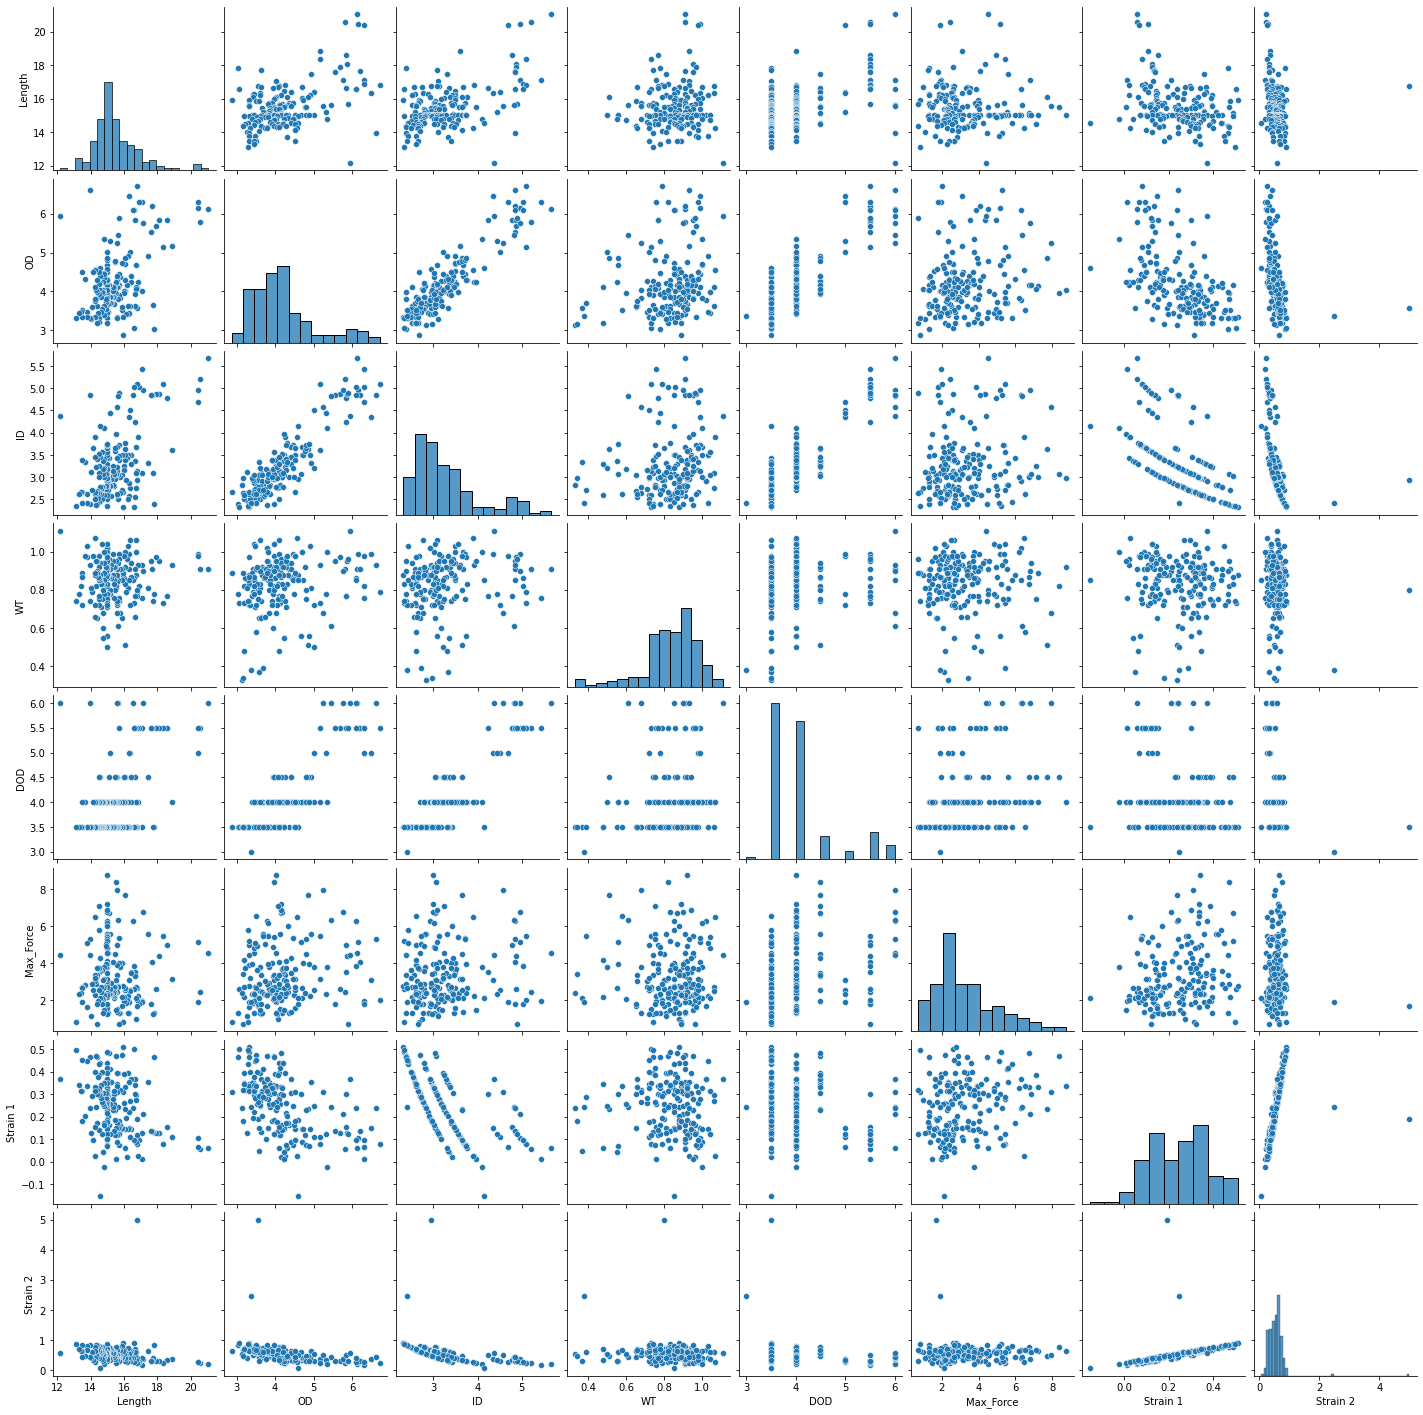

In [4]:
# Let's see the possible best variables for modeling the carat
sns.pairplot(df);

# ID vs. Length:

In [5]:
df.dropna(subset = ["Length","ID"], inplace=True)   # Drop NA from Length and ID columns
df

Type  Length    OD    ID    WT  DOD  Max_Force Average  Strain 1​  \
0    3R 6a    21.05  6.12  5.67  0.91  6.0       4.53     NaN   0.058201   
1    3R 5a    20.58  5.80  5.21  0.91  5.5       2.46     NaN   0.055662   
2    1R 15    20.45  6.14  4.97  0.99  5.5       5.14     NaN   0.106640   
3    3R 5a    20.41  6.31  4.69  0.98  5.0       1.89     NaN   0.066098   
4     3R 4a   18.86  5.17  3.61  0.93  4.0       3.11     NaN   0.108033   
..      ...     ...   ...   ...   ...  ...        ...     ...        ...   
174    1R 8   13.46  3.33  2.66  0.87  3.5       1.88     NaN   0.315789   
175   1R 10   13.44  3.46  2.66  0.82  3.5       2.38     NaN   0.315789   
176   1R 8​   13.29  3.45  2.61  0.78  3.5       2.30     NaN   0.340996   
177    1R 3   13.11  3.30  2.34  0.74  3.5       0.80     NaN   0.495726   
178   3R 3a   12.16  5.93  4.38  1.11  6.0       4.42     NaN   0.369863   

     Strain 2​  
0         0.22  
1         0.23  
2         0.29  
3         0.26  
4         0.36  
..         ...  
174       0.65  
175       0.65  
176       0.69  
177       0.88  
178       0.58  

[179 rows x 10 columns]

In [6]:
# Find correlations between variables and the target (Max_Force)
correlation_matrix = df.corr()
correlation_matrix["Max_Force"]
# No of rows and, rows_prickles, and DOD have most correlation with Max_Force

Length      -0.020429
OD           0.183919
ID           0.150021
WT          -0.011380
DOD          0.332265
Max_Force    1.000000
Strain 1​    0.200875
Strain 2​   -0.019277
Name: Max_Force, dtype: float64

In [7]:
df.corr().style.background_gradient(cmap='coolwarm')

In [8]:
df = df.drop(["Strain 1​","Strain 2​","DOD", "WT", "OD", "Average"], axis=1)
df.head()

Type  Length    ID  Max_Force
0  3R 6a    21.05  5.67       4.53
1  3R 5a    20.58  5.21       2.46
2  1R 15    20.45  4.97       5.14
3  3R 5a    20.41  4.69       1.89
4   3R 4a   18.86  3.61       3.11

In [9]:
# Checking for missing values
df.isna().sum()

Type         0
Length       0
ID           0
Max_Force    0
dtype: int64

# K-Mean:

Text(0, 0.5, 'ID')

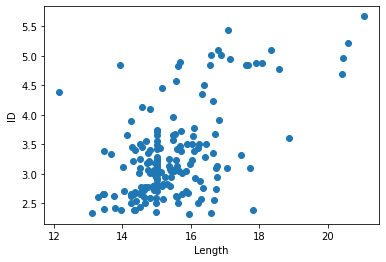

In [10]:
plt.scatter(df.Length,df['ID'])
plt.xlabel('Length')
plt.ylabel('ID')

In [11]:
# Used n_cluster=2 based on elbow plot below that shows the optimal number of the clusters is 2.
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['Length','ID']])     # There are [[]] because there is another columnin the table that we don't need, Type.
y_predicted 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

In [12]:
df['cluster']=y_predicted
df.head()

Type  Length    ID  Max_Force  cluster
0  3R 6a    21.05  5.67       4.53        0
1  3R 5a    20.58  5.21       2.46        0
2  1R 15    20.45  4.97       5.14        0
3  3R 5a    20.41  4.69       1.89        0
4   3R 4a   18.86  3.61       3.11        0

In [13]:
km.cluster_centers_

array([[17.681     ,  4.298     ],
       [15.03637584,  3.0995302 ]])

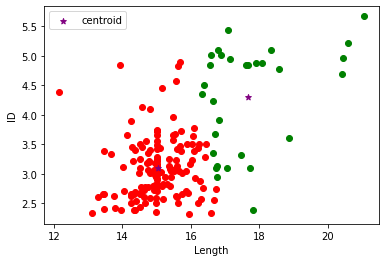

In [14]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
# df3 = df[df.cluster==2]
plt.scatter(df1.Length,df1['ID'],color='green')
plt.scatter(df2.Length,df2['ID'],color='red')
# plt.scatter(df3.Length,df3['ID'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Length')
plt.ylabel('ID')
plt.legend()

## Preprocessing using min max scaler:

In [15]:
scaler = MinMaxScaler()

scaler.fit(df[['ID']])
df['ID'] = scaler.transform(df[['ID']])

scaler.fit(df[['Length']])
df['Length'] = scaler.transform(df[['Length']])

df.head()

Type    Length        ID  Max_Force  cluster
0  3R 6a   1.000000  1.000000       4.53        0
1  3R 5a   0.947132  0.862687       2.46        0
2  1R 15   0.932508  0.791045       5.14        0
3  3R 5a   0.928009  0.707463       1.89        0
4   3R 4a  0.753656  0.385075       3.11        0

In [16]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['Length','ID']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int32)

In [17]:
df['cluster']=y_predicted
df.head()

Type    Length        ID  Max_Force  cluster
0  3R 6a   1.000000  1.000000       4.53        1
1  3R 5a   0.947132  0.862687       2.46        1
2  1R 15   0.932508  0.791045       5.14        1
3  3R 5a   0.928009  0.707463       1.89        1
4   3R 4a  0.753656  0.385075       3.11        1

In [18]:
km.cluster_centers_

array([[0.33646529, 0.21728612],
       [0.59081076, 0.73616533]])

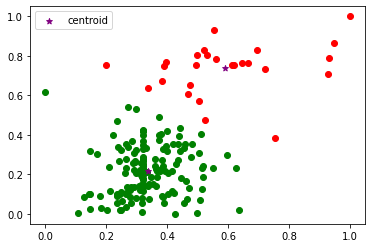

In [19]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
# df3 = df[df.cluster==2]
plt.scatter(df1.Length,df1['ID'],color='green')
plt.scatter(df2.Length,df2['ID'],color='red')
# plt.scatter(df3.Length,df3['ID'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

## Elbow plot:

In [20]:
sse = []
k_rng = range(1,12)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Length','ID']])
    sse.append(km.inertia_)

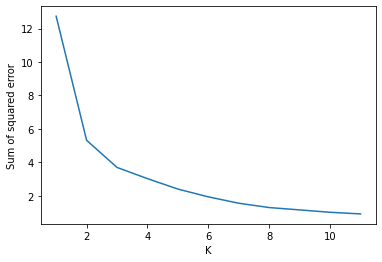

In [21]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

The best number of clusters is 2 (elbow).

## The Silhouette Method

In [22]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,12):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(df[['Length','ID']]).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df[['Length','ID']],labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.6396963888529642
Silhouette score for k(clusters) = 3 is 0.3832247296064935
Silhouette score for k(clusters) = 4 is 0.34945819446774135
Silhouette score for k(clusters) = 5 is 0.37475093395909864
Silhouette score for k(clusters) = 6 is 0.3466245634198031
Silhouette score for k(clusters) = 7 is 0.40652977506725246
Silhouette score for k(clusters) = 8 is 0.41560272559404066
Silhouette score for k(clusters) = 9 is 0.4165928912138258
Silhouette score for k(clusters) = 10 is 0.4186030660060073
Silhouette score for k(clusters) = 11 is 0.3812518574538653


# OD vs. Length:

In [23]:
import pandas as pd
df02 = pd.read_excel("/Users/negin/Desktop/UVA/projects with Prof. Baek/Johns Hopkins University/NM_Work/Vaso-Lock_edited_data.xlsx")
print(df02)

       Type  Length    OD    ID    WT  DOD  Max_Force Average  Strain 1​  \
0    3R 6a    21.05  6.12  5.67  0.91  6.0       4.53     NaN   0.058201   
1    3R 5a    20.58  5.80  5.21  0.91  5.5       2.46     NaN   0.055662   
2    1R 15    20.45  6.14  4.97  0.99  5.5       5.14     NaN   0.106640   
3    3R 5a    20.41  6.31  4.69  0.98  5.0       1.89     NaN   0.066098   
4     3R 4a   18.86  5.17  3.61  0.93  4.0       3.11     NaN   0.108033   
..      ...     ...   ...   ...   ...  ...        ...     ...        ...   
182    1R 3     NaN  3.37  2.41  0.38  3.0       1.91     NaN   0.244813   
183   2R 5a     NaN  3.19  2.60  0.48  3.5       4.15     NaN   0.346154   
184   1R 10     NaN  3.69  2.72  0.39  3.5       5.46     NaN   0.286765   
185    1R 8     NaN  3.16  2.97  0.34  3.5       3.41     NaN   0.178451   
186  2R 10      NaN  4.10  3.30  0.48  3.5       2.17     NaN   0.060606   

     Strain 2​  
0         0.22  
1         0.23  
2         0.29  
3         0.26  
4 

In [24]:
df02.head()

Type  Length    OD    ID    WT  DOD  Max_Force Average  Strain 1​  \
0  3R 6a    21.05  6.12  5.67  0.91  6.0       4.53     NaN   0.058201   
1  3R 5a    20.58  5.80  5.21  0.91  5.5       2.46     NaN   0.055662   
2  1R 15    20.45  6.14  4.97  0.99  5.5       5.14     NaN   0.106640   
3  3R 5a    20.41  6.31  4.69  0.98  5.0       1.89     NaN   0.066098   
4   3R 4a   18.86  5.17  3.61  0.93  4.0       3.11     NaN   0.108033   

   Strain 2​  
0       0.22  
1       0.23  
2       0.29  
3       0.26  
4       0.36

In [25]:
df02.dropna(subset = ["Length","OD"], inplace=True)   # Drop NA from Length and ID columns
df02

Type  Length    OD    ID    WT  DOD  Max_Force Average  Strain 1​  \
0    3R 6a    21.05  6.12  5.67  0.91  6.0       4.53     NaN   0.058201   
1    3R 5a    20.58  5.80  5.21  0.91  5.5       2.46     NaN   0.055662   
2    1R 15    20.45  6.14  4.97  0.99  5.5       5.14     NaN   0.106640   
3    3R 5a    20.41  6.31  4.69  0.98  5.0       1.89     NaN   0.066098   
4     3R 4a   18.86  5.17  3.61  0.93  4.0       3.11     NaN   0.108033   
..      ...     ...   ...   ...   ...  ...        ...     ...        ...   
174    1R 8   13.46  3.33  2.66  0.87  3.5       1.88     NaN   0.315789   
175   1R 10   13.44  3.46  2.66  0.82  3.5       2.38     NaN   0.315789   
176   1R 8​   13.29  3.45  2.61  0.78  3.5       2.30     NaN   0.340996   
177    1R 3   13.11  3.30  2.34  0.74  3.5       0.80     NaN   0.495726   
178   3R 3a   12.16  5.93  4.38  1.11  6.0       4.42     NaN   0.369863   

     Strain 2​  
0         0.22  
1         0.23  
2         0.29  
3         0.26  
4         0.36  
..         ...  
174       0.65  
175       0.65  
176       0.69  
177       0.88  
178       0.58  

[179 rows x 10 columns]

In [26]:
df02 = df02.drop(["Strain 1​","Strain 2​","DOD", "WT", "ID", "Average"], axis=1)
df02.head()

Type  Length    OD  Max_Force
0  3R 6a    21.05  6.12       4.53
1  3R 5a    20.58  5.80       2.46
2  1R 15    20.45  6.14       5.14
3  3R 5a    20.41  6.31       1.89
4   3R 4a   18.86  5.17       3.11

In [27]:
# Checking for missing values
df02.isna().sum()

Type         0
Length       0
OD           0
Max_Force    0
dtype: int64

# K-Mean:

Text(0, 0.5, 'OD')

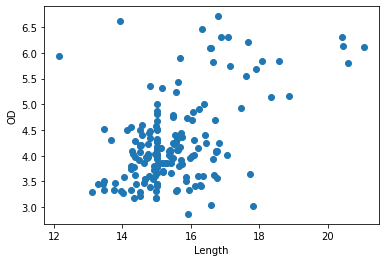

In [28]:
plt.scatter(df02.Length,df02['OD'])
plt.xlabel('Length')
plt.ylabel('OD')

In [29]:
# Used n_cluster=2 based on elbow plot below that shows the optimal number of the clusters is 2.
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df02[['Length','OD']])     # There are [[]] because there is another columnin the table that we don't need, Type.
y_predicted 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int32)

In [30]:
df02['cluster']=y_predicted
df02.head()

Type  Length    OD  Max_Force  cluster
0  3R 6a    21.05  6.12       4.53        1
1  3R 5a    20.58  5.80       2.46        1
2  1R 15    20.45  6.14       5.14        1
3  3R 5a    20.41  6.31       1.89        1
4   3R 4a   18.86  5.17       3.11        1

In [31]:
km.cluster_centers_

array([[15.08065359,  4.02444444],
       [17.82730769,  5.49692308]])

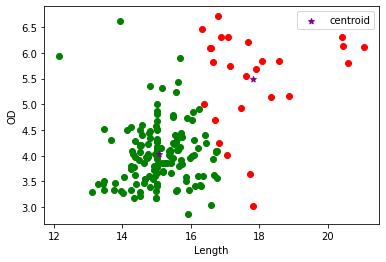

In [32]:
df3 = df02[df02.cluster==0]
df4 = df02[df02.cluster==1]
# df3 = df[df.cluster==2]
plt.scatter(df3.Length,df3['OD'],color='green')
plt.scatter(df4.Length,df4['OD'],color='red')
# plt.scatter(df3.Length,df3['OD'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Length')
plt.ylabel('OD')
plt.legend()

## Preprocessing using min max scaler:

In [33]:
scaler = MinMaxScaler()

scaler.fit(df02[['OD']])
df02['OD'] = scaler.transform(df02[['OD']])

scaler.fit(df02[['Length']])
df02['Length'] = scaler.transform(df02[['Length']])

df02.head()

Type    Length        OD  Max_Force  cluster
0  3R 6a   1.000000  0.846354       4.53        1
1  3R 5a   0.947132  0.763021       2.46        1
2  1R 15   0.932508  0.851562       5.14        1
3  3R 5a   0.928009  0.895833       1.89        1
4   3R 4a  0.753656  0.598958       3.11        1

In [34]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df02[['Length','OD']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1], dtype=int32)

In [35]:
df02['cluster']=y_predicted
df02.head()

Type    Length        OD  Max_Force  cluster
0  3R 6a   1.000000  0.846354       4.53        1
1  3R 5a   0.947132  0.763021       2.46        1
2  1R 15   0.932508  0.851562       5.14        1
3  3R 5a   0.928009  0.895833       1.89        1
4   3R 4a  0.753656  0.598958       3.11        1

In [36]:
km.cluster_centers_

array([[0.33766779, 0.27807292],
       [0.55827935, 0.76113506]])

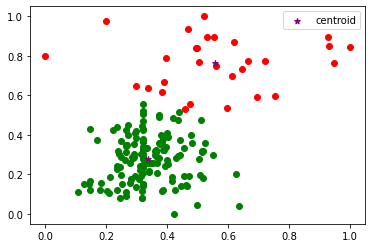

In [37]:
df3 = df02[df02.cluster==0]
df4 = df02[df02.cluster==1]
# df3 = df[df.cluster==2]
plt.scatter(df3.Length,df3['OD'],color='green')
plt.scatter(df4.Length,df4['OD'],color='red')
# plt.scatter(df3.Length,df3['OD'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

## Elbow plot:

In [38]:
sse = []
k_rng = range(1,12)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df02[['Length','OD']])
    sse.append(km.inertia_)

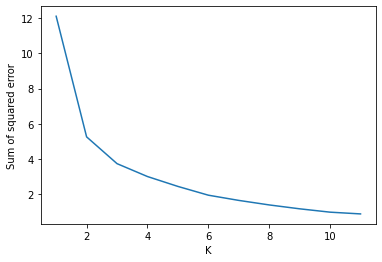

In [39]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

The best number of clusters is 2 (elbow).

## The Silhouette Method

In [40]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,12):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(df02[['Length','OD']]).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df02[['Length','OD']],labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.6214035140573674
Silhouette score for k(clusters) = 3 is 0.3627381749799996
Silhouette score for k(clusters) = 4 is 0.35986976131652504
Silhouette score for k(clusters) = 5 is 0.367790529277079
Silhouette score for k(clusters) = 6 is 0.38610071203224955
Silhouette score for k(clusters) = 7 is 0.3985164011353051
Silhouette score for k(clusters) = 8 is 0.3886080374985944
Silhouette score for k(clusters) = 9 is 0.38571889700640394
Silhouette score for k(clusters) = 10 is 0.3860384480087068
Silhouette score for k(clusters) = 11 is 0.36835795749961503


# OD vs. ID:

In [41]:
import pandas as pd
df03 = pd.read_excel("/Users/negin/Desktop/UVA/projects with Prof. Baek/Johns Hopkins University/NM_Work/Vaso-Lock_edited_data.xlsx")
print(df03)

       Type  Length    OD    ID    WT  DOD  Max_Force Average  Strain 1​  \
0    3R 6a    21.05  6.12  5.67  0.91  6.0       4.53     NaN   0.058201   
1    3R 5a    20.58  5.80  5.21  0.91  5.5       2.46     NaN   0.055662   
2    1R 15    20.45  6.14  4.97  0.99  5.5       5.14     NaN   0.106640   
3    3R 5a    20.41  6.31  4.69  0.98  5.0       1.89     NaN   0.066098   
4     3R 4a   18.86  5.17  3.61  0.93  4.0       3.11     NaN   0.108033   
..      ...     ...   ...   ...   ...  ...        ...     ...        ...   
182    1R 3     NaN  3.37  2.41  0.38  3.0       1.91     NaN   0.244813   
183   2R 5a     NaN  3.19  2.60  0.48  3.5       4.15     NaN   0.346154   
184   1R 10     NaN  3.69  2.72  0.39  3.5       5.46     NaN   0.286765   
185    1R 8     NaN  3.16  2.97  0.34  3.5       3.41     NaN   0.178451   
186  2R 10      NaN  4.10  3.30  0.48  3.5       2.17     NaN   0.060606   

     Strain 2​  
0         0.22  
1         0.23  
2         0.29  
3         0.26  
4 

In [42]:
df03.head()

Type  Length    OD    ID    WT  DOD  Max_Force Average  Strain 1​  \
0  3R 6a    21.05  6.12  5.67  0.91  6.0       4.53     NaN   0.058201   
1  3R 5a    20.58  5.80  5.21  0.91  5.5       2.46     NaN   0.055662   
2  1R 15    20.45  6.14  4.97  0.99  5.5       5.14     NaN   0.106640   
3  3R 5a    20.41  6.31  4.69  0.98  5.0       1.89     NaN   0.066098   
4   3R 4a   18.86  5.17  3.61  0.93  4.0       3.11     NaN   0.108033   

   Strain 2​  
0       0.22  
1       0.23  
2       0.29  
3       0.26  
4       0.36

In [43]:
df03.dropna(subset = ["ID","OD"], inplace=True)   # Drop NA from Length and ID columns
df03

Type  Length    OD    ID    WT  DOD  Max_Force Average  Strain 1​  \
0    3R 6a    21.05  6.12  5.67  0.91  6.0       4.53     NaN   0.058201   
1    3R 5a    20.58  5.80  5.21  0.91  5.5       2.46     NaN   0.055662   
2    1R 15    20.45  6.14  4.97  0.99  5.5       5.14     NaN   0.106640   
3    3R 5a    20.41  6.31  4.69  0.98  5.0       1.89     NaN   0.066098   
4     3R 4a   18.86  5.17  3.61  0.93  4.0       3.11     NaN   0.108033   
..      ...     ...   ...   ...   ...  ...        ...     ...        ...   
182    1R 3     NaN  3.37  2.41  0.38  3.0       1.91     NaN   0.244813   
183   2R 5a     NaN  3.19  2.60  0.48  3.5       4.15     NaN   0.346154   
184   1R 10     NaN  3.69  2.72  0.39  3.5       5.46     NaN   0.286765   
185    1R 8     NaN  3.16  2.97  0.34  3.5       3.41     NaN   0.178451   
186  2R 10      NaN  4.10  3.30  0.48  3.5       2.17     NaN   0.060606   

     Strain 2​  
0         0.22  
1         0.23  
2         0.29  
3         0.26  
4         0.36  
..         ...  
182       2.48  
183       0.69  
184       0.62  
185       0.48  
186       0.33  

[187 rows x 10 columns]

In [44]:
df03 = df03.drop(["Strain 1​","Strain 2​","DOD", "WT", "Length", "Average"], axis=1)
df03.head()

Type    OD    ID  Max_Force
0  3R 6a   6.12  5.67       4.53
1  3R 5a   5.80  5.21       2.46
2  1R 15   6.14  4.97       5.14
3  3R 5a   6.31  4.69       1.89
4   3R 4a  5.17  3.61       3.11

In [45]:
# Checking for missing values
df03.isna().sum()

Type         0
OD           0
ID           0
Max_Force    0
dtype: int64

# K-Mean:

Text(0, 0.5, 'OD')

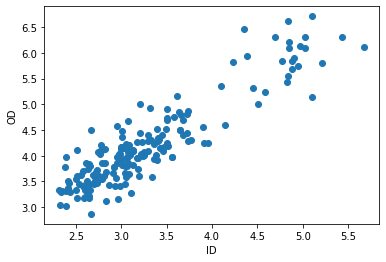

In [46]:
plt.scatter(df03.ID,df03['OD'])
plt.xlabel('ID')
plt.ylabel('OD')

In [47]:
# Used n_cluster=2 based on elbow plot below that shows the optimal number of the clusters is 2.
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df03[['ID','OD']])     # There are [[]] because there is another columnin the table that we don't need, Type.
y_predicted 

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [48]:
df03['cluster']=y_predicted
df03.head()

Type    OD    ID  Max_Force  cluster
0  3R 6a   6.12  5.67       4.53        1
1  3R 5a   5.80  5.21       2.46        1
2  1R 15   6.14  4.97       5.14        1
3  3R 5a   6.31  4.69       1.89        1
4   3R 4a  5.17  3.61       3.11        0

In [49]:
km.cluster_centers_

array([[3.03204969, 3.93416149],
       [4.82307692, 5.88423077]])

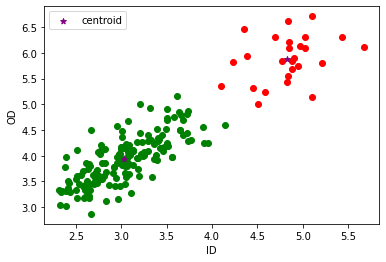

In [50]:
df5 = df03[df03.cluster==0]
df6 = df03[df03.cluster==1]
# df3 = df[df.cluster==2]
plt.scatter(df5.ID,df5['OD'],color='green')
plt.scatter(df6.ID,df6['OD'],color='red')
# plt.scatter(df3.Length,df3['OD'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('ID')
plt.ylabel('OD')
plt.legend()

## Preprocessing using min max scaler:

In [51]:
scaler = MinMaxScaler()

scaler.fit(df03[['OD']])
df03['OD'] = scaler.transform(df03[['OD']])

scaler.fit(df03[['ID']])
df03['ID'] = scaler.transform(df03[['ID']])

df03.head()

Type        OD        ID  Max_Force  cluster
0  3R 6a   0.846354  1.000000       4.53        1
1  3R 5a   0.763021  0.862687       2.46        1
2  1R 15   0.851562  0.791045       5.14        1
3  3R 5a   0.895833  0.707463       1.89        1
4   3R 4a  0.598958  0.385075       3.11        0

In [52]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df03[['ID','OD']])
y_predicted

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [53]:
df03['cluster']=y_predicted
df03.head()

Type        OD        ID  Max_Force  cluster
0  3R 6a   0.846354  1.000000       4.53        0
1  3R 5a   0.763021  0.862687       2.46        0
2  1R 15   0.851562  0.791045       5.14        0
3  3R 5a   0.895833  0.707463       1.89        0
4   3R 4a  0.598958  0.385075       3.11        1

In [54]:
km.cluster_centers_

array([[0.74718714, 0.78495593],
       [0.21255215, 0.27712539]])

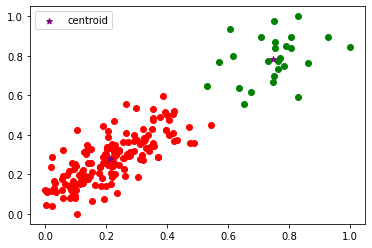

In [55]:
df5 = df03[df03.cluster==0]
df6 = df03[df03.cluster==1]
# df3 = df[df.cluster==2]
plt.scatter(df5.ID,df5['OD'],color='green')
plt.scatter(df6.ID,df6['OD'],color='red')
# plt.scatter(df3.Length,df3['OD'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

## Elbow plot:

In [56]:
sse = []
k_rng = range(1,12)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df03[['ID','OD']])
    sse.append(km.inertia_)

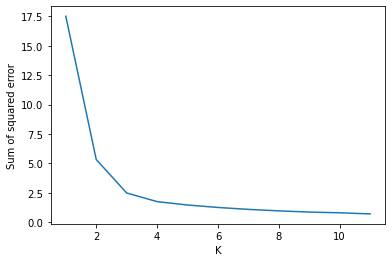

In [57]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

The best number of clusters is 2 (elbow).

## The Silhouette Method

In [58]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,12):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(df03[['ID','OD']]).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df03[['ID','OD']],labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.7021302667582634
Silhouette score for k(clusters) = 3 is 0.5056506178465519
Silhouette score for k(clusters) = 4 is 0.4591360432768172
Silhouette score for k(clusters) = 5 is 0.42507115187654304
Silhouette score for k(clusters) = 6 is 0.35832190474354747
Silhouette score for k(clusters) = 7 is 0.3539300361797718
Silhouette score for k(clusters) = 8 is 0.35635695683124885
Silhouette score for k(clusters) = 9 is 0.3539559370796674
Silhouette score for k(clusters) = 10 is 0.36029087538147686
Silhouette score for k(clusters) = 11 is 0.3550575773294854


# SVM:

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# importing the required modules for data visualization
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.offline as pyoff
import pandas as pd

In [60]:
df02

Type    Length        OD  Max_Force  cluster
0    3R 6a   1.000000  0.846354       4.53        1
1    3R 5a   0.947132  0.763021       2.46        1
2    1R 15   0.932508  0.851562       5.14        1
3    3R 5a   0.928009  0.895833       1.89        1
4     3R 4a  0.753656  0.598958       3.11        1
..      ...       ...       ...        ...      ...
174    1R 8  0.146232  0.119792       1.88        0
175   1R 10  0.143982  0.153646       2.38        0
176   1R 8​  0.127109  0.151042       2.30        0
177    1R 3  0.106862  0.111979       0.80        0
178   3R 3a  0.000000  0.796875       4.42        1

[179 rows x 5 columns]

In [61]:
# split the data into inputs and outputs
X = df02.iloc[:, [1,2]].values
y = df02.iloc[:, 4].values

In [62]:
# counting the total output data from cluster column
target_balance = df02['cluster'].value_counts().reset_index()
target_balance

index  cluster
0      0      150
1      1       29

In [63]:
# dividing the output classes into two sections
target_class = go.Bar(
    name = 'Target Balance',
    x = ['Green_0', 'Red_1'],
    y = target_balance['cluster']
)

# ploting the output classes
fig = go.Figure(target_class)
pyoff.iplot(fig)

In [64]:
# training and testing data
from sklearn.model_selection import train_test_split

# assign test data size 25%
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=0)

In [65]:
# importing StandardScaler
from sklearn.preprocessing import StandardScaler

# scalling the input data
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [66]:
X_train

array([[-0.36935813, -0.96227128],
       [ 0.95809528,  2.98317479],
       [-0.56958853, -0.31665283],
       [-0.36935813,  0.08984768],
       [-0.72532328, -1.09378615],
       [ 1.15832568, -0.24491745],
       [ 0.27582872, -0.8427123 ],
       [-0.25811901, -0.4362118 ],
       [-0.510261  ,  1.35717278],
       [ 0.52055477, -0.07753489],
       [-0.45093347, -0.80684461],
       [ 0.92101557, -0.13731437],
       [-0.05047267, -0.28078514],
       [-0.22845525, -0.60359436],
       [-0.62150011, -0.79488872],
       [-0.90330586, -0.13731437],
       [-0.35452624, -0.66337385],
       [-0.85139428, -1.24921281],
       [ 0.85427211, -0.34056462],
       [-0.36935813,  0.13767126],
       [-0.36935813, -0.08949078],
       [-0.40643783, -0.20904975],
       [-0.92555369,  0.4126569 ],
       [ 0.06818238, -1.05791845],
       [ 3.67232961,  2.30168865],
       [ 0.12009397, -0.48403539],
       [-0.36935813, -0.22100565],
       [-0.36935813, -0.05362309],
       [ 0.43156348,

In [67]:
# importing SVM module
from sklearn.svm import SVC

# kernel to be set linear as it is binary class
classifier = SVC(kernel='linear')

# traininf the model
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [68]:
# testing the model
y_pred = classifier.predict(X_test)


In [69]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_test, y_pred))


1.0


### The accuracy of the model is 100%

In [70]:
# importing the modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# plotting the fgiure
plt.figure(figsize = (7,7))

# assigning the input values
X_set, y_set = X_train, y_train

<Figure size 504x504 with 0 Axes>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


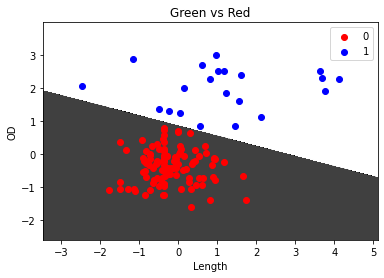

In [71]:
# ploting the linear graph
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# ploting scattered graph for the values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)

# labeling the graph
plt.title('Green vs Red')
plt.xlabel('Length')
plt.ylabel('OD')
plt.legend()
plt.show()

### We can also visualize the predictions of our model, bypassing the testing dataset. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


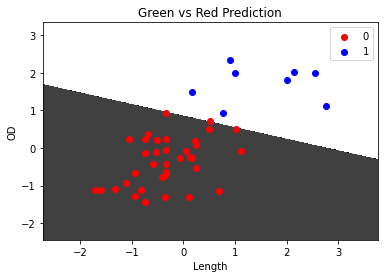

In [72]:

# assigning the testing dataset
X_set, y_set = X_test, y_test

# ploting the predicted graph
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# plorting scattred graph for the testing values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'blue'))(i), label = j)

# labelling the graphe
plt.title('Green vs Red Prediction')
plt.xlabel('Length')
plt.ylabel('OD')
plt.legend()
plt.show()

# Confusion Matrix:

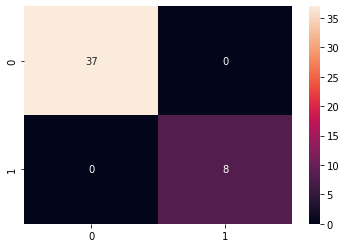

In [73]:
# importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

# true Write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

# Classification Report:

In [74]:
# importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00         8

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# * ***Below are the clustering after Phong's optimized suggestions***

# OD vs. Features, NOT including Length, and WT:

In [75]:
import pandas as pd
df04 = pd.read_csv("/Users/negin/Desktop/UVA/projects with Prof. Baek/Johns Hopkins University/Phong_Work/vasso_feature_space.csv")
print(df04)

     Length    OD    ID    WT  Feature1  Feature2  Feature3  Feature4  \
0     16.02  4.00  3.24  0.86      1.61      1.83      2.51      3.07   
1     13.44  3.46  2.66  0.82      2.40      2.96      3.42      3.82   
2     14.63  3.86  2.61  0.83      2.13      2.58      3.40      3.89   
3     16.08  4.02  3.38  0.92      1.59      1.79      2.47      2.88   
4     16.03  4.70  3.50  1.00      1.65      1.98      2.39      3.06   
..      ...   ...   ...   ...       ...       ...       ...       ...   
182   18.08  5.85  4.88  0.95      1.15      1.56      1.78      2.12   
183   21.05  6.12  5.67  0.91      0.42      0.85      1.29      1.51   
184   16.55  6.10  4.85  0.85      1.43      1.79      2.04      2.39   
185   17.13  5.75  4.95  0.90      1.32      1.64      1.86      2.26   
186   15.56  5.24  4.58  0.68      1.57      1.80      2.06      2.36   

     Feature5  Feature6  ...  Feature159  Feature160  Feature161  Feature162  \
0        3.46      4.25  ...       10.20   

In [76]:
df04.head()

Length    OD    ID    WT  Feature1  Feature2  Feature3  Feature4  Feature5  \
0   16.02  4.00  3.24  0.86      1.61      1.83      2.51      3.07      3.46   
1   13.44  3.46  2.66  0.82      2.40      2.96      3.42      3.82      4.75   
2   14.63  3.86  2.61  0.83      2.13      2.58      3.40      3.89      4.41   
3   16.08  4.02  3.38  0.92      1.59      1.79      2.47      2.88      3.31   
4   16.03  4.70  3.50  1.00      1.65      1.98      2.39      3.06      3.42   

   Feature6  ...  Feature159  Feature160  Feature161  Feature162  Feature163  \
0      4.25  ...       10.20       10.98       11.78       12.63        9.82   
1      5.98  ...       11.95       12.75       13.59       14.48       11.52   
2      5.64  ...       11.24       12.05       12.92       13.80       10.83   
3      3.90  ...        9.90       10.67       11.48       12.30        9.50   
4      3.95  ...        9.00        9.76       10.61       11.81        8.28   

   Feature164  Feature165  Feature166  Feature167  Feature168  
0       10.54       11.27       12.11       12.84       13.62  
1       12.33       13.08       13.81       14.59       15.43  
2       11.52       12.38       13.11       13.91       14.77  
3       10.24       10.96       11.80       12.53       13.32  
4        9.30       10.06       10.82       11.60       12.43  

[5 rows x 172 columns]

In [77]:
df04.dropna(subset = ["ID","OD"], inplace=True)   # Drop NA from Length and ID columns
df04

Length    OD    ID    WT  Feature1  Feature2  Feature3  Feature4  \
0     16.02  4.00  3.24  0.86      1.61      1.83      2.51      3.07   
1     13.44  3.46  2.66  0.82      2.40      2.96      3.42      3.82   
2     14.63  3.86  2.61  0.83      2.13      2.58      3.40      3.89   
3     16.08  4.02  3.38  0.92      1.59      1.79      2.47      2.88   
4     16.03  4.70  3.50  1.00      1.65      1.98      2.39      3.06   
..      ...   ...   ...   ...       ...       ...       ...       ...   
182   18.08  5.85  4.88  0.95      1.15      1.56      1.78      2.12   
183   21.05  6.12  5.67  0.91      0.42      0.85      1.29      1.51   
184   16.55  6.10  4.85  0.85      1.43      1.79      2.04      2.39   
185   17.13  5.75  4.95  0.90      1.32      1.64      1.86      2.26   
186   15.56  5.24  4.58  0.68      1.57      1.80      2.06      2.36   

     Feature5  Feature6  ...  Feature159  Feature160  Feature161  Feature162  \
0        3.46      4.25  ...       10.20       10.98       11.78       12.63   
1        4.75      5.98  ...       11.95       12.75       13.59       14.48   
2        4.41      5.64  ...       11.24       12.05       12.92       13.80   
3        3.31      3.90  ...        9.90       10.67       11.48       12.30   
4        3.42      3.95  ...        9.00        9.76       10.61       11.81   
..        ...       ...  ...         ...         ...         ...         ...   
182      2.43      2.99  ...        5.86        6.77        8.09        9.59   
183      1.64      1.71  ...        4.02        4.94        5.90        6.82   
184      2.53      3.21  ...        6.08        7.93        9.13       10.37   
185      2.42      3.04  ...        6.40        7.57        8.86       10.40   
186      2.92      3.12  ...        8.08        9.17       10.38       11.89   

     Feature163  Feature164  Feature165  Feature166  Feature167  Feature168  
0          9.82       10.54       11.27       12.11       12.84       13.62  
1         11.52       12.33       13.08       13.81       14.59       15.43  
2         10.83       11.52       12.38       13.11       13.91       14.77  
3          9.50       10.24       10.96       11.80       12.53       13.32  
4          8.28        9.30       10.06       10.82       11.60       12.43  
..          ...         ...         ...         ...         ...         ...  
182        5.09        5.82        6.84        7.74        8.83        9.93  
183        4.00        4.28        4.92        5.94        6.88        7.78  
184        5.36        6.02        7.09        8.12        9.37       10.77  
185        5.49        6.39        7.39        8.32        9.37       10.44  
186        7.15        8.16        9.07       10.16       11.13       12.28  

[187 rows x 172 columns]

In [78]:
df04 = df04.drop(["WT", "Length"], axis=1)
df04.head()

OD    ID  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
0  4.00  3.24      1.61      1.83      2.51      3.07      3.46      4.25   
1  3.46  2.66      2.40      2.96      3.42      3.82      4.75      5.98   
2  3.86  2.61      2.13      2.58      3.40      3.89      4.41      5.64   
3  4.02  3.38      1.59      1.79      2.47      2.88      3.31      3.90   
4  4.70  3.50      1.65      1.98      2.39      3.06      3.42      3.95   

   Feature7  Feature8  ...  Feature159  Feature160  Feature161  Feature162  \
0      1.94      2.06  ...       10.20       10.98       11.78       12.63   
1      2.30      2.97  ...       11.95       12.75       13.59       14.48   
2      2.35      2.65  ...       11.24       12.05       12.92       13.80   
3      1.94      2.06  ...        9.90       10.67       11.48       12.30   
4      1.83      2.03  ...        9.00        9.76       10.61       11.81   

   Feature163  Feature164  Feature165  Feature166  Feature167  Feature168  
0        9.82       10.54       11.27       12.11       12.84       13.62  
1       11.52       12.33       13.08       13.81       14.59       15.43  
2       10.83       11.52       12.38       13.11       13.91       14.77  
3        9.50       10.24       10.96       11.80       12.53       13.32  
4        8.28        9.30       10.06       10.82       11.60       12.43  

[5 rows x 170 columns]

In [79]:
# Checking for missing values
df04.isna().sum()

OD            0
ID            0
Feature1      0
Feature2      0
Feature3      0
             ..
Feature164    0
Feature165    0
Feature166    0
Feature167    0
Feature168    0
Length: 170, dtype: int64

# K-Mean:

In [80]:
df04.iloc[:, 0:170]

OD    ID  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
0    4.00  3.24      1.61      1.83      2.51      3.07      3.46      4.25   
1    3.46  2.66      2.40      2.96      3.42      3.82      4.75      5.98   
2    3.86  2.61      2.13      2.58      3.40      3.89      4.41      5.64   
3    4.02  3.38      1.59      1.79      2.47      2.88      3.31      3.90   
4    4.70  3.50      1.65      1.98      2.39      3.06      3.42      3.95   
..    ...   ...       ...       ...       ...       ...       ...       ...   
182  5.85  4.88      1.15      1.56      1.78      2.12      2.43      2.99   
183  6.12  5.67      0.42      0.85      1.29      1.51      1.64      1.71   
184  6.10  4.85      1.43      1.79      2.04      2.39      2.53      3.21   
185  5.75  4.95      1.32      1.64      1.86      2.26      2.42      3.04   
186  5.24  4.58      1.57      1.80      2.06      2.36      2.92      3.12   

     Feature7  Feature8  ...  Feature159  Feature160  Feature161  Feature162  \
0        1.94      2.06  ...       10.20       10.98       11.78       12.63   
1        2.30      2.97  ...       11.95       12.75       13.59       14.48   
2        2.35      2.65  ...       11.24       12.05       12.92       13.80   
3        1.94      2.06  ...        9.90       10.67       11.48       12.30   
4        1.83      2.03  ...        9.00        9.76       10.61       11.81   
..        ...       ...  ...         ...         ...         ...         ...   
182      0.99      1.39  ...        5.86        6.77        8.09        9.59   
183      0.26      0.60  ...        4.02        4.94        5.90        6.82   
184      1.25      1.63  ...        6.08        7.93        9.13       10.37   
185      1.24      1.65  ...        6.40        7.57        8.86       10.40   
186      1.75      2.00  ...        8.08        9.17       10.38       11.89   

     Feature163  Feature164  Feature165  Feature166  Feature167  Feature168  
0          9.82       10.54       11.27       12.11       12.84       13.62  
1         11.52       12.33       13.08       13.81       14.59       15.43  
2         10.83       11.52       12.38       13.11       13.91       14.77  
3          9.50       10.24       10.96       11.80       12.53       13.32  
4          8.28        9.30       10.06       10.82       11.60       12.43  
..          ...         ...         ...         ...         ...         ...  
182        5.09        5.82        6.84        7.74        8.83        9.93  
183        4.00        4.28        4.92        5.94        6.88        7.78  
184        5.36        6.02        7.09        8.12        9.37       10.77  
185        5.49        6.39        7.39        8.32        9.37       10.44  
186        7.15        8.16        9.07       10.16       11.13       12.28  

[187 rows x 170 columns]

In [81]:
# Used n_cluster=2 based on elbow plot below that shows the optimal number of the clusters is 2.
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df04.iloc[:, 0:170])     # There are [[]] because there is another columnin the table that we don't need, Type.
y_predicted 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [82]:
df04['cluster']=y_predicted
df04.head()

OD    ID  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
0  4.00  3.24      1.61      1.83      2.51      3.07      3.46      4.25   
1  3.46  2.66      2.40      2.96      3.42      3.82      4.75      5.98   
2  3.86  2.61      2.13      2.58      3.40      3.89      4.41      5.64   
3  4.02  3.38      1.59      1.79      2.47      2.88      3.31      3.90   
4  4.70  3.50      1.65      1.98      2.39      3.06      3.42      3.95   

   Feature7  Feature8  ...  Feature160  Feature161  Feature162  Feature163  \
0      1.94      2.06  ...       10.98       11.78       12.63        9.82   
1      2.30      2.97  ...       12.75       13.59       14.48       11.52   
2      2.35      2.65  ...       12.05       12.92       13.80       10.83   
3      1.94      2.06  ...       10.67       11.48       12.30        9.50   
4      1.83      2.03  ...        9.76       10.61       11.81        8.28   

   Feature164  Feature165  Feature166  Feature167  Feature168  cluster  
0       10.54       11.27       12.11       12.84       13.62        1  
1       12.33       13.08       13.81       14.59       15.43        1  
2       11.52       12.38       13.11       13.91       14.77        1  
3       10.24       10.96       11.80       12.53       13.32        1  
4        9.30       10.06       10.82       11.60       12.43        1  

[5 rows x 171 columns]

In [83]:
km.cluster_centers_

array([[ 5.73366667,  4.67      ,  1.324     ,  1.664     ,  1.96066667,
         2.29466667,  2.61566667,  3.06266667,  1.25733333,  1.605     ,
         1.92366667,  2.22266667,  2.554     ,  2.96266667,  1.635     ,
         1.934     ,  2.14866667,  2.342     ,  2.623     ,  3.08      ,
         1.87766667,  2.08566667,  2.28766667,  2.43133333,  2.737     ,
         3.258     ,  1.997     ,  2.277     ,  2.50333333,  2.578     ,
         2.83466667,  3.502     ,  2.206     ,  2.55533333,  2.73833333,
         2.73133333,  2.937     ,  3.76966667,  2.461     ,  2.79766667,
         2.94433333,  3.00666667,  3.21366667,  3.96433333,  1.22966667,
         1.57566667,  2.01966667,  2.49633333,  3.06      ,  3.62166667,
         1.46766667,  1.77466667,  2.11933333,  2.623     ,  3.22433333,
         3.89166667,  1.865     ,  2.13266667,  2.37833333,  2.79666667,
         3.47533333,  4.244     ,  2.14433333,  2.43333333,  2.56966667,
         2.991     ,  3.72433333,  4.74066667,  2.4

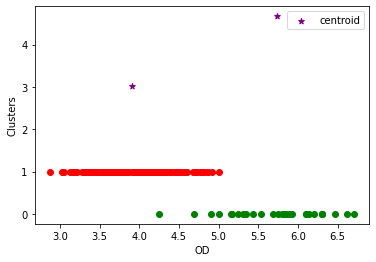

In [84]:
df7 = df04[df04.cluster==0]
df8 = df04[df04.cluster==1]
# df3 = df[df.cluster==2]
plt.scatter(df7["OD"],df7["cluster"],color='green')
plt.scatter(df8["OD"], df8["cluster"],color='red')
# plt.scatter(df3.Length,df3['OD'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('OD')
plt.ylabel('Clusters')
plt.legend()

## Preprocessing using min max scaler:

In [85]:
scaler = MinMaxScaler()

scaler.fit(df04.iloc[:, 0:170])
df04.iloc[:, 0:170] = scaler.transform(df04.iloc[:, 0:170])

df04.head()

OD        ID  Feature1  Feature2  Feature3  Feature4  Feature5  \
0  0.294271  0.274627  0.572115  0.406639  0.420690  0.422764  0.381551   
1  0.153646  0.101493  0.951923  0.875519  0.734483  0.626016  0.651992   
2  0.257813  0.086567  0.822115  0.717842  0.727586  0.644986  0.580713   
3  0.299479  0.316418  0.562500  0.390041  0.406897  0.371274  0.350105   
4  0.476563  0.352239  0.591346  0.468880  0.379310  0.420054  0.373166   

   Feature6  Feature7  Feature8  ...  Feature160  Feature161  Feature162  \
0  0.422629  0.624535  0.503448  ...    0.648765    0.644031    0.641989   
1  0.710483  0.758364  0.817241  ...    0.838883    0.842278    0.846409   
2  0.653910  0.776952  0.706897  ...    0.763695    0.768894    0.771271   
3  0.364393  0.624535  0.503448  ...    0.615467    0.611172    0.605525   
4  0.372712  0.583643  0.493103  ...    0.517723    0.515882    0.551381   

   Feature163  Feature164  Feature165  Feature166  Feature167  Feature168  \
0    0.648107    0.662434    0.655315    0.653602    0.645022    0.642464   
1    0.837416    0.851852    0.842105    0.833686    0.834416    0.841584   
2    0.760579    0.766138    0.769866    0.759534    0.760823    0.768977   
3    0.612472    0.630688    0.623323    0.620763    0.611472    0.609461   
4    0.476615    0.531217    0.530444    0.516949    0.510823    0.511551   

   cluster  
0        1  
1        1  
2        1  
3        1  
4        1  

[5 rows x 171 columns]

In [86]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df04.iloc[:, 0:170])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [87]:
df04['cluster']=y_predicted
df04.head()

OD        ID  Feature1  Feature2  Feature3  Feature4  Feature5  \
0  0.294271  0.274627  0.572115  0.406639  0.420690  0.422764  0.381551   
1  0.153646  0.101493  0.951923  0.875519  0.734483  0.626016  0.651992   
2  0.257813  0.086567  0.822115  0.717842  0.727586  0.644986  0.580713   
3  0.299479  0.316418  0.562500  0.390041  0.406897  0.371274  0.350105   
4  0.476563  0.352239  0.591346  0.468880  0.379310  0.420054  0.373166   

   Feature6  Feature7  Feature8  ...  Feature160  Feature161  Feature162  \
0  0.422629  0.624535  0.503448  ...    0.648765    0.644031    0.641989   
1  0.710483  0.758364  0.817241  ...    0.838883    0.842278    0.846409   
2  0.653910  0.776952  0.706897  ...    0.763695    0.768894    0.771271   
3  0.364393  0.624535  0.503448  ...    0.615467    0.611172    0.605525   
4  0.372712  0.583643  0.493103  ...    0.517723    0.515882    0.551381   

   Feature163  Feature164  Feature165  Feature166  Feature167  Feature168  \
0    0.648107    0.662434    0.655315    0.653602    0.645022    0.642464   
1    0.837416    0.851852    0.842105    0.833686    0.834416    0.841584   
2    0.760579    0.766138    0.769866    0.759534    0.760823    0.768977   
3    0.612472    0.630688    0.623323    0.620763    0.611472    0.609461   
4    0.476615    0.531217    0.530444    0.516949    0.510823    0.511551   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 171 columns]

In [88]:
km.cluster_centers_

array([[0.26999866, 0.20707998, 0.67461785, 0.60644749, 0.55565871,
        0.5285074 , 0.50991776, 0.53885618, 0.68673148, 0.61370469,
        0.50067912, 0.47080232, 0.48279411, 0.53840782, 0.57822762,
        0.48134808, 0.47559537, 0.42869882, 0.47365541, 0.57288876,
        0.44350397, 0.36955439, 0.3610933 , 0.45377139, 0.55657748,
        0.61975768, 0.37907252, 0.34396811, 0.35737179, 0.46928904,
        0.61402883, 0.71739594, 0.4255749 , 0.40191984, 0.42739345,
        0.51812555, 0.597903  , 0.64660059, 0.50046904, 0.50442814,
        0.52161033, 0.60554749, 0.65154193, 0.64413047, 0.62211326,
        0.55142998, 0.50514556, 0.47992933, 0.53872318, 0.5973214 ,
        0.47989655, 0.46634615, 0.49615603, 0.55636855, 0.63154061,
        0.63982085, 0.48466566, 0.43095238, 0.51625854, 0.57768137,
        0.65922632, 0.71944082, 0.44102564, 0.43108575, 0.53811984,
        0.65941324, 0.70851902, 0.73145117, 0.48002108, 0.48843667,
        0.53913074, 0.60641844, 0.70852343, 0.78

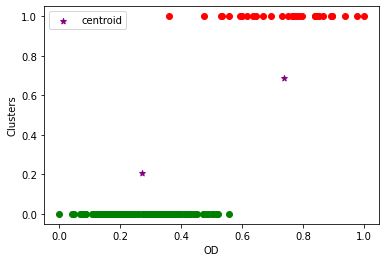

In [89]:

df7 = df04[df04.cluster==0]
df8 = df04[df04.cluster==1]
# df3 = df[df.cluster==2]
plt.scatter(df7["OD"],df7["cluster"],color='green')
plt.scatter(df8["OD"], df8["cluster"],color='red')
# plt.scatter(df3.Length,df3['OD'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('OD')
plt.ylabel('Clusters')
plt.legend()

## Elbow plot:

In [90]:
sse = []
k_rng = range(1,12)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df04.iloc[:, 0:170])
    sse.append(km.inertia_)

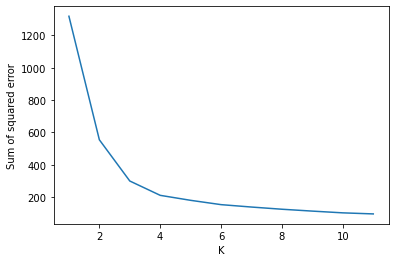

In [91]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

The best number of clusters is 2 (elbow).

## The Silhouette Method

In [92]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,12):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(df04.iloc[:, 0:170]).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df04.iloc[:, 0:170],labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.5919357137479544
Silhouette score for k(clusters) = 3 is 0.43333864959264395
Silhouette score for k(clusters) = 4 is 0.3958028749939741
Silhouette score for k(clusters) = 5 is 0.33910309039499054
Silhouette score for k(clusters) = 6 is 0.3327612021114334
Silhouette score for k(clusters) = 7 is 0.28624237313099293
Silhouette score for k(clusters) = 8 is 0.29050524512352477
Silhouette score for k(clusters) = 9 is 0.31504959681563005
Silhouette score for k(clusters) = 10 is 0.2995312261562985
Silhouette score for k(clusters) = 11 is 0.30055469986938416


# OD vs. Features, NOT including ID, OD, Length, and WT:

In [93]:
import pandas as pd
df05 = pd.read_csv("/Users/negin/Desktop/UVA/projects with Prof. Baek/Johns Hopkins University/Phong_Work/vasso_feature_space.csv")
print(df05)

     Length    OD    ID    WT  Feature1  Feature2  Feature3  Feature4  \
0     16.02  4.00  3.24  0.86      1.61      1.83      2.51      3.07   
1     13.44  3.46  2.66  0.82      2.40      2.96      3.42      3.82   
2     14.63  3.86  2.61  0.83      2.13      2.58      3.40      3.89   
3     16.08  4.02  3.38  0.92      1.59      1.79      2.47      2.88   
4     16.03  4.70  3.50  1.00      1.65      1.98      2.39      3.06   
..      ...   ...   ...   ...       ...       ...       ...       ...   
182   18.08  5.85  4.88  0.95      1.15      1.56      1.78      2.12   
183   21.05  6.12  5.67  0.91      0.42      0.85      1.29      1.51   
184   16.55  6.10  4.85  0.85      1.43      1.79      2.04      2.39   
185   17.13  5.75  4.95  0.90      1.32      1.64      1.86      2.26   
186   15.56  5.24  4.58  0.68      1.57      1.80      2.06      2.36   

     Feature5  Feature6  ...  Feature159  Feature160  Feature161  Feature162  \
0        3.46      4.25  ...       10.20   

In [94]:
df05.head()

Length    OD    ID    WT  Feature1  Feature2  Feature3  Feature4  Feature5  \
0   16.02  4.00  3.24  0.86      1.61      1.83      2.51      3.07      3.46   
1   13.44  3.46  2.66  0.82      2.40      2.96      3.42      3.82      4.75   
2   14.63  3.86  2.61  0.83      2.13      2.58      3.40      3.89      4.41   
3   16.08  4.02  3.38  0.92      1.59      1.79      2.47      2.88      3.31   
4   16.03  4.70  3.50  1.00      1.65      1.98      2.39      3.06      3.42   

   Feature6  ...  Feature159  Feature160  Feature161  Feature162  Feature163  \
0      4.25  ...       10.20       10.98       11.78       12.63        9.82   
1      5.98  ...       11.95       12.75       13.59       14.48       11.52   
2      5.64  ...       11.24       12.05       12.92       13.80       10.83   
3      3.90  ...        9.90       10.67       11.48       12.30        9.50   
4      3.95  ...        9.00        9.76       10.61       11.81        8.28   

   Feature164  Feature165  Feature166  Feature167  Feature168  
0       10.54       11.27       12.11       12.84       13.62  
1       12.33       13.08       13.81       14.59       15.43  
2       11.52       12.38       13.11       13.91       14.77  
3       10.24       10.96       11.80       12.53       13.32  
4        9.30       10.06       10.82       11.60       12.43  

[5 rows x 172 columns]

In [95]:
df05.dropna(subset = ["ID","OD"], inplace=True)   # Drop NA from Length and ID columns
df05

Length    OD    ID    WT  Feature1  Feature2  Feature3  Feature4  \
0     16.02  4.00  3.24  0.86      1.61      1.83      2.51      3.07   
1     13.44  3.46  2.66  0.82      2.40      2.96      3.42      3.82   
2     14.63  3.86  2.61  0.83      2.13      2.58      3.40      3.89   
3     16.08  4.02  3.38  0.92      1.59      1.79      2.47      2.88   
4     16.03  4.70  3.50  1.00      1.65      1.98      2.39      3.06   
..      ...   ...   ...   ...       ...       ...       ...       ...   
182   18.08  5.85  4.88  0.95      1.15      1.56      1.78      2.12   
183   21.05  6.12  5.67  0.91      0.42      0.85      1.29      1.51   
184   16.55  6.10  4.85  0.85      1.43      1.79      2.04      2.39   
185   17.13  5.75  4.95  0.90      1.32      1.64      1.86      2.26   
186   15.56  5.24  4.58  0.68      1.57      1.80      2.06      2.36   

     Feature5  Feature6  ...  Feature159  Feature160  Feature161  Feature162  \
0        3.46      4.25  ...       10.20       10.98       11.78       12.63   
1        4.75      5.98  ...       11.95       12.75       13.59       14.48   
2        4.41      5.64  ...       11.24       12.05       12.92       13.80   
3        3.31      3.90  ...        9.90       10.67       11.48       12.30   
4        3.42      3.95  ...        9.00        9.76       10.61       11.81   
..        ...       ...  ...         ...         ...         ...         ...   
182      2.43      2.99  ...        5.86        6.77        8.09        9.59   
183      1.64      1.71  ...        4.02        4.94        5.90        6.82   
184      2.53      3.21  ...        6.08        7.93        9.13       10.37   
185      2.42      3.04  ...        6.40        7.57        8.86       10.40   
186      2.92      3.12  ...        8.08        9.17       10.38       11.89   

     Feature163  Feature164  Feature165  Feature166  Feature167  Feature168  
0          9.82       10.54       11.27       12.11       12.84       13.62  
1         11.52       12.33       13.08       13.81       14.59       15.43  
2         10.83       11.52       12.38       13.11       13.91       14.77  
3          9.50       10.24       10.96       11.80       12.53       13.32  
4          8.28        9.30       10.06       10.82       11.60       12.43  
..          ...         ...         ...         ...         ...         ...  
182        5.09        5.82        6.84        7.74        8.83        9.93  
183        4.00        4.28        4.92        5.94        6.88        7.78  
184        5.36        6.02        7.09        8.12        9.37       10.77  
185        5.49        6.39        7.39        8.32        9.37       10.44  
186        7.15        8.16        9.07       10.16       11.13       12.28  

[187 rows x 172 columns]

In [96]:
df05 = df05.drop(["WT", "Length"], axis=1)
df05.head()

OD    ID  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
0  4.00  3.24      1.61      1.83      2.51      3.07      3.46      4.25   
1  3.46  2.66      2.40      2.96      3.42      3.82      4.75      5.98   
2  3.86  2.61      2.13      2.58      3.40      3.89      4.41      5.64   
3  4.02  3.38      1.59      1.79      2.47      2.88      3.31      3.90   
4  4.70  3.50      1.65      1.98      2.39      3.06      3.42      3.95   

   Feature7  Feature8  ...  Feature159  Feature160  Feature161  Feature162  \
0      1.94      2.06  ...       10.20       10.98       11.78       12.63   
1      2.30      2.97  ...       11.95       12.75       13.59       14.48   
2      2.35      2.65  ...       11.24       12.05       12.92       13.80   
3      1.94      2.06  ...        9.90       10.67       11.48       12.30   
4      1.83      2.03  ...        9.00        9.76       10.61       11.81   

   Feature163  Feature164  Feature165  Feature166  Feature167  Feature168  
0        9.82       10.54       11.27       12.11       12.84       13.62  
1       11.52       12.33       13.08       13.81       14.59       15.43  
2       10.83       11.52       12.38       13.11       13.91       14.77  
3        9.50       10.24       10.96       11.80       12.53       13.32  
4        8.28        9.30       10.06       10.82       11.60       12.43  

[5 rows x 170 columns]

In [97]:
# Checking for missing values
df05.isna().sum()

OD            0
ID            0
Feature1      0
Feature2      0
Feature3      0
             ..
Feature164    0
Feature165    0
Feature166    0
Feature167    0
Feature168    0
Length: 170, dtype: int64

# K-Mean:

In [98]:
df05.iloc[:, 2:170]

Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
0        1.61      1.83      2.51      3.07      3.46      4.25      1.94   
1        2.40      2.96      3.42      3.82      4.75      5.98      2.30   
2        2.13      2.58      3.40      3.89      4.41      5.64      2.35   
3        1.59      1.79      2.47      2.88      3.31      3.90      1.94   
4        1.65      1.98      2.39      3.06      3.42      3.95      1.83   
..        ...       ...       ...       ...       ...       ...       ...   
182      1.15      1.56      1.78      2.12      2.43      2.99      0.99   
183      0.42      0.85      1.29      1.51      1.64      1.71      0.26   
184      1.43      1.79      2.04      2.39      2.53      3.21      1.25   
185      1.32      1.64      1.86      2.26      2.42      3.04      1.24   
186      1.57      1.80      2.06      2.36      2.92      3.12      1.75   

     Feature8  Feature9  Feature10  ...  Feature159  Feature160  Feature161  \
0        2.06      2.44       3.15  ...       10.20       10.98       11.78   
1        2.97      3.46       4.12  ...       11.95       12.75       13.59   
2        2.65      3.39       3.92  ...       11.24       12.05       12.92   
3        2.06      2.35       3.03  ...        9.90       10.67       11.48   
4        2.03      2.56       2.90  ...        9.00        9.76       10.61   
..        ...       ...        ...  ...         ...         ...         ...   
182      1.39      1.75       1.99  ...        5.86        6.77        8.09   
183      0.60      0.99       1.39  ...        4.02        4.94        5.90   
184      1.63      1.94       2.35  ...        6.08        7.93        9.13   
185      1.65      1.93       2.16  ...        6.40        7.57        8.86   
186      2.00      2.13       2.29  ...        8.08        9.17       10.38   

     Feature162  Feature163  Feature164  Feature165  Feature166  Feature167  \
0         12.63        9.82       10.54       11.27       12.11       12.84   
1         14.48       11.52       12.33       13.08       13.81       14.59   
2         13.80       10.83       11.52       12.38       13.11       13.91   
3         12.30        9.50       10.24       10.96       11.80       12.53   
4         11.81        8.28        9.30       10.06       10.82       11.60   
..          ...         ...         ...         ...         ...         ...   
182        9.59        5.09        5.82        6.84        7.74        8.83   
183        6.82        4.00        4.28        4.92        5.94        6.88   
184       10.37        5.36        6.02        7.09        8.12        9.37   
185       10.40        5.49        6.39        7.39        8.32        9.37   
186       11.89        7.15        8.16        9.07       10.16       11.13   

     Feature168  
0         13.62  
1         15.43  
2         14.77  
3         13.32  
4         12.43  
..          ...  
182        9.93  
183        7.78  
184       10.77  
185       10.44  
186       12.28  

[187 rows x 168 columns]

In [99]:
# Used n_cluster=2 based on elbow plot below that shows the optimal number of the clusters is 2.
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df05.iloc[:, 2:170])     # There are [[]] because there is another columnin the table that we don't need, Type.
y_predicted 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [100]:
df05['cluster']=y_predicted
df05.head()

OD    ID  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
0  4.00  3.24      1.61      1.83      2.51      3.07      3.46      4.25   
1  3.46  2.66      2.40      2.96      3.42      3.82      4.75      5.98   
2  3.86  2.61      2.13      2.58      3.40      3.89      4.41      5.64   
3  4.02  3.38      1.59      1.79      2.47      2.88      3.31      3.90   
4  4.70  3.50      1.65      1.98      2.39      3.06      3.42      3.95   

   Feature7  Feature8  ...  Feature160  Feature161  Feature162  Feature163  \
0      1.94      2.06  ...       10.98       11.78       12.63        9.82   
1      2.30      2.97  ...       12.75       13.59       14.48       11.52   
2      2.35      2.65  ...       12.05       12.92       13.80       10.83   
3      1.94      2.06  ...       10.67       11.48       12.30        9.50   
4      1.83      2.03  ...        9.76       10.61       11.81        8.28   

   Feature164  Feature165  Feature166  Feature167  Feature168  cluster  
0       10.54       11.27       12.11       12.84       13.62        1  
1       12.33       13.08       13.81       14.59       15.43        1  
2       11.52       12.38       13.11       13.91       14.77        1  
3       10.24       10.96       11.80       12.53       13.32        1  
4        9.30       10.06       10.82       11.60       12.43        1  

[5 rows x 171 columns]

In [101]:
km.cluster_centers_

array([[ 1.324     ,  1.664     ,  1.96066667,  2.29466667,  2.61566667,
         3.06266667,  1.25733333,  1.605     ,  1.92366667,  2.22266667,
         2.554     ,  2.96266667,  1.635     ,  1.934     ,  2.14866667,
         2.342     ,  2.623     ,  3.08      ,  1.87766667,  2.08566667,
         2.28766667,  2.43133333,  2.737     ,  3.258     ,  1.997     ,
         2.277     ,  2.50333333,  2.578     ,  2.83466667,  3.502     ,
         2.206     ,  2.55533333,  2.73833333,  2.73133333,  2.937     ,
         3.76966667,  2.461     ,  2.79766667,  2.94433333,  3.00666667,
         3.21366667,  3.96433333,  1.22966667,  1.57566667,  2.01966667,
         2.49633333,  3.06      ,  3.62166667,  1.46766667,  1.77466667,
         2.11933333,  2.623     ,  3.22433333,  3.89166667,  1.865     ,
         2.13266667,  2.37833333,  2.79666667,  3.47533333,  4.244     ,
         2.14433333,  2.43333333,  2.56966667,  2.991     ,  3.72433333,
         4.74066667,  2.439     ,  2.697     ,  2.7

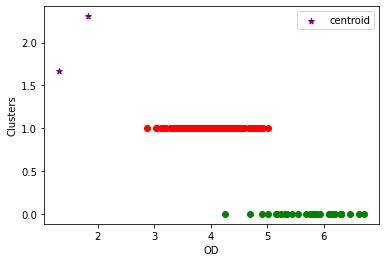

In [102]:
df9 = df05[df05.cluster==0]        # Create a column including all cluster = 0 and name it df9
df10 = df05[df05.cluster==1]
# df3 = df[df.cluster==2]
plt.scatter(df9["OD"],df9["cluster"],color='green')
plt.scatter(df10["OD"], df10["cluster"],color='red')
# plt.scatter(df3.Length,df3['OD'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('OD')
plt.ylabel('Clusters')
plt.legend()

## Preprocessing using min max scaler:

In [103]:
df05.iloc[:, 2:170]

Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
0        1.61      1.83      2.51      3.07      3.46      4.25      1.94   
1        2.40      2.96      3.42      3.82      4.75      5.98      2.30   
2        2.13      2.58      3.40      3.89      4.41      5.64      2.35   
3        1.59      1.79      2.47      2.88      3.31      3.90      1.94   
4        1.65      1.98      2.39      3.06      3.42      3.95      1.83   
..        ...       ...       ...       ...       ...       ...       ...   
182      1.15      1.56      1.78      2.12      2.43      2.99      0.99   
183      0.42      0.85      1.29      1.51      1.64      1.71      0.26   
184      1.43      1.79      2.04      2.39      2.53      3.21      1.25   
185      1.32      1.64      1.86      2.26      2.42      3.04      1.24   
186      1.57      1.80      2.06      2.36      2.92      3.12      1.75   

     Feature8  Feature9  Feature10  ...  Feature159  Feature160  Feature161  \
0        2.06      2.44       3.15  ...       10.20       10.98       11.78   
1        2.97      3.46       4.12  ...       11.95       12.75       13.59   
2        2.65      3.39       3.92  ...       11.24       12.05       12.92   
3        2.06      2.35       3.03  ...        9.90       10.67       11.48   
4        2.03      2.56       2.90  ...        9.00        9.76       10.61   
..        ...       ...        ...  ...         ...         ...         ...   
182      1.39      1.75       1.99  ...        5.86        6.77        8.09   
183      0.60      0.99       1.39  ...        4.02        4.94        5.90   
184      1.63      1.94       2.35  ...        6.08        7.93        9.13   
185      1.65      1.93       2.16  ...        6.40        7.57        8.86   
186      2.00      2.13       2.29  ...        8.08        9.17       10.38   

     Feature162  Feature163  Feature164  Feature165  Feature166  Feature167  \
0         12.63        9.82       10.54       11.27       12.11       12.84   
1         14.48       11.52       12.33       13.08       13.81       14.59   
2         13.80       10.83       11.52       12.38       13.11       13.91   
3         12.30        9.50       10.24       10.96       11.80       12.53   
4         11.81        8.28        9.30       10.06       10.82       11.60   
..          ...         ...         ...         ...         ...         ...   
182        9.59        5.09        5.82        6.84        7.74        8.83   
183        6.82        4.00        4.28        4.92        5.94        6.88   
184       10.37        5.36        6.02        7.09        8.12        9.37   
185       10.40        5.49        6.39        7.39        8.32        9.37   
186       11.89        7.15        8.16        9.07       10.16       11.13   

     Feature168  
0         13.62  
1         15.43  
2         14.77  
3         13.32  
4         12.43  
..          ...  
182        9.93  
183        7.78  
184       10.77  
185       10.44  
186       12.28  

[187 rows x 168 columns]

In [104]:
scaler = MinMaxScaler()

scaler.fit(df05.iloc[:, 0:170])
df05.iloc[:, 0:170] = scaler.transform(df05.iloc[:, 0:170])

df05.head()

OD        ID  Feature1  Feature2  Feature3  Feature4  Feature5  \
0  0.294271  0.274627  0.572115  0.406639  0.420690  0.422764  0.381551   
1  0.153646  0.101493  0.951923  0.875519  0.734483  0.626016  0.651992   
2  0.257813  0.086567  0.822115  0.717842  0.727586  0.644986  0.580713   
3  0.299479  0.316418  0.562500  0.390041  0.406897  0.371274  0.350105   
4  0.476563  0.352239  0.591346  0.468880  0.379310  0.420054  0.373166   

   Feature6  Feature7  Feature8  ...  Feature160  Feature161  Feature162  \
0  0.422629  0.624535  0.503448  ...    0.648765    0.644031    0.641989   
1  0.710483  0.758364  0.817241  ...    0.838883    0.842278    0.846409   
2  0.653910  0.776952  0.706897  ...    0.763695    0.768894    0.771271   
3  0.364393  0.624535  0.503448  ...    0.615467    0.611172    0.605525   
4  0.372712  0.583643  0.493103  ...    0.517723    0.515882    0.551381   

   Feature163  Feature164  Feature165  Feature166  Feature167  Feature168  \
0    0.648107    0.662434    0.655315    0.653602    0.645022    0.642464   
1    0.837416    0.851852    0.842105    0.833686    0.834416    0.841584   
2    0.760579    0.766138    0.769866    0.759534    0.760823    0.768977   
3    0.612472    0.630688    0.623323    0.620763    0.611472    0.609461   
4    0.476615    0.531217    0.530444    0.516949    0.510823    0.511551   

   cluster  
0        1  
1        1  
2        1  
3        1  
4        1  

[5 rows x 171 columns]

In [105]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df05.iloc[:, 2:170])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [106]:
df05['cluster']=y_predicted
df05.head()

OD        ID  Feature1  Feature2  Feature3  Feature4  Feature5  \
0  0.294271  0.274627  0.572115  0.406639  0.420690  0.422764  0.381551   
1  0.153646  0.101493  0.951923  0.875519  0.734483  0.626016  0.651992   
2  0.257813  0.086567  0.822115  0.717842  0.727586  0.644986  0.580713   
3  0.299479  0.316418  0.562500  0.390041  0.406897  0.371274  0.350105   
4  0.476563  0.352239  0.591346  0.468880  0.379310  0.420054  0.373166   

   Feature6  Feature7  Feature8  ...  Feature160  Feature161  Feature162  \
0  0.422629  0.624535  0.503448  ...    0.648765    0.644031    0.641989   
1  0.710483  0.758364  0.817241  ...    0.838883    0.842278    0.846409   
2  0.653910  0.776952  0.706897  ...    0.763695    0.768894    0.771271   
3  0.364393  0.624535  0.503448  ...    0.615467    0.611172    0.605525   
4  0.372712  0.583643  0.493103  ...    0.517723    0.515882    0.551381   

   Feature163  Feature164  Feature165  Feature166  Feature167  Feature168  \
0    0.648107    0.662434    0.655315    0.653602    0.645022    0.642464   
1    0.837416    0.851852    0.842105    0.833686    0.834416    0.841584   
2    0.760579    0.766138    0.769866    0.759534    0.760823    0.768977   
3    0.612472    0.630688    0.623323    0.620763    0.611472    0.609461   
4    0.476615    0.531217    0.530444    0.516949    0.510823    0.511551   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 171 columns]

In [107]:
df05_cluster_col = df05.drop(df05.iloc[:, 0:170], axis=1)
df05_cluster_col

cluster
0          0
1          0
2          0
3          0
4          0
..       ...
182        1
183        1
184        1
185        1
186        1

[187 rows x 1 columns]

In [108]:
# unscaled_df05_denormalized = scaler.inverse_transform(df05.iloc[:, 0:170])
# unscaled_df05_denormalized

In [109]:
km.cluster_centers_

array([[0.67461785, 0.60644749, 0.55565871, 0.5285074 , 0.50991776,
        0.53885618, 0.68673148, 0.61370469, 0.50067912, 0.47080232,
        0.48279411, 0.53840782, 0.57822762, 0.48134808, 0.47559537,
        0.42869882, 0.47365541, 0.57288876, 0.44350397, 0.36955439,
        0.3610933 , 0.45377139, 0.55657748, 0.61975768, 0.37907252,
        0.34396811, 0.35737179, 0.46928904, 0.61402883, 0.71739594,
        0.4255749 , 0.40191984, 0.42739345, 0.51812555, 0.597903  ,
        0.64660059, 0.50046904, 0.50442814, 0.52161033, 0.60554749,
        0.65154193, 0.64413047, 0.62211326, 0.55142998, 0.50514556,
        0.47992933, 0.53872318, 0.5973214 , 0.47989655, 0.46634615,
        0.49615603, 0.55636855, 0.63154061, 0.63982085, 0.48466566,
        0.43095238, 0.51625854, 0.57768137, 0.65922632, 0.71944082,
        0.44102564, 0.43108575, 0.53811984, 0.65941324, 0.70851902,
        0.73145117, 0.48002108, 0.48843667, 0.53913074, 0.60641844,
        0.70852343, 0.78865917, 0.53359545, 0.55

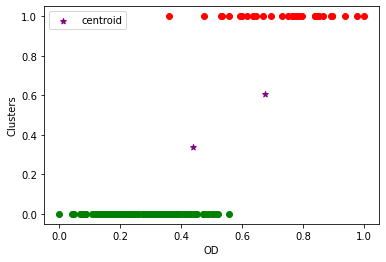

In [110]:
df9 = df05[df05.cluster==0]
df10 = df05[df05.cluster==1]
# df3 = df[df.cluster==2]
plt.scatter(df9["OD"],df9["cluster"],color='green')
plt.scatter(df10["OD"], df10["cluster"],color='red')
# plt.scatter(df3.Length,df3['OD'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('OD')
plt.ylabel('Clusters')
plt.legend()

## Elbow plot:

In [111]:
sse = []
k_rng = range(1,12)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df05.iloc[:, 2:170])
    sse.append(km.inertia_)

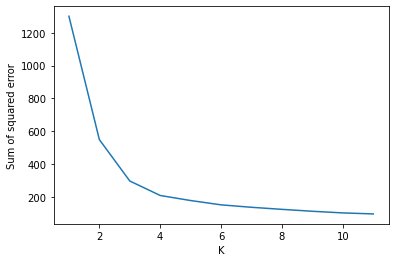

In [112]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

The best number of clusters is 2 (elbow).

## The Silhouette Method

In [113]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,12):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(df05.iloc[:, 2:170]).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df05.iloc[:, 2:170],labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.5912463989530304
Silhouette score for k(clusters) = 3 is 0.4337295284429985
Silhouette score for k(clusters) = 4 is 0.3967989845711805
Silhouette score for k(clusters) = 5 is 0.3439226154802509
Silhouette score for k(clusters) = 6 is 0.34619635786280695
Silhouette score for k(clusters) = 7 is 0.3528418844224161
Silhouette score for k(clusters) = 8 is 0.29178397186200583
Silhouette score for k(clusters) = 9 is 0.316873254343549
Silhouette score for k(clusters) = 10 is 0.2915244514888045
Silhouette score for k(clusters) = 11 is 0.2769101613552375


# Increasing number of clusters

## 3 clusters:

In [114]:
# scaler = MinMaxScaler()

# scaler.fit(df05.iloc[:, 0:170])
# df05.iloc[:, 0:170] = scaler.transform(df05.iloc[:, 0:170])

# df05.head()

In [115]:
# km = KMeans(n_clusters=3)
# y_predicted = km.fit_predict(df05.iloc[:, 2:170])
# y_predicted

In [116]:
# df05['cluster']=y_predicted
# df05.head()

In [117]:
# km.cluster_centers_

In [118]:
# df9 = df05[df05.cluster==0]
# df10 = df05[df05.cluster==1]
# df11 = df05[df05.cluster==2]
# # df3 = df[df.cluster==2]
# plt.scatter(df9["OD"],df9["cluster"],color='green')
# plt.scatter(df10["OD"], df10["cluster"],color='red')
# plt.scatter(df11["OD"], df11["cluster"],color='blue')
# # plt.scatter(df3.Length,df3['OD'],color='black')
# plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
# plt.xlabel('OD')
# plt.ylabel('Clusters')
# plt.legend()

In [119]:
# plt.scatter(df9["ID"],df9["cluster"],color='green')
# plt.scatter(df10["ID"], df10["cluster"],color='red')
# plt.scatter(df11["ID"], df11["cluster"],color='blue')
# # plt.scatter(df3.Length,df3['OD'],color='black')
# plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
# plt.xlabel('ID')
# plt.ylabel('Clusters')
# plt.legend()

In [120]:
# df05_cluster_col3 = df05.drop(df05.iloc[:, 0:170], axis=1)
# df05_cluster_col3

## Un-normalizing for 3 clusters:

In [121]:
# df05

### ****If you want the chuck below to work, you have to comment out all chuncks in "Increasing Number of Clusters" section.

In [122]:
# unscaled = scaler.inverse_transform(df05.iloc[:, 0:170])
# unscaled

In [123]:
# unscaled.shape

In [124]:
# df05_denormalized = pd. DataFrame(unscaled) 
# df05_denormalized

In [125]:
# df05_denormalized_clusters3 = pd.concat([df05_denormalized, df05_cluster_col3], axis=1, join='inner')
# display(df05_denormalized_clusters3)

In [126]:
# # Specify the name of the excel file
# file_name = 'denormalized_and_clusters3_by_OD.xlsx'
  
# # saving the excelsheet
# df05_denormalized_clusters3.to_excel(file_name)
# print('Table successfully exported into Excel File')

In [127]:
# df12 = df05_denormalized_clusters3
# df12

In [128]:
# df12.rename(columns = {0: 'OD', 1: 'ID'}, inplace = True)
# df12

## 4 clusters:

In [129]:
# scaler = MinMaxScaler()

# scaler.fit(df05.iloc[:, 0:170])
# df05.iloc[:, 0:170] = scaler.transform(df05.iloc[:, 0:170])

# df05.head()

In [130]:
# km = KMeans(n_clusters=4)
# y_predicted = km.fit_predict(df05.iloc[:, 2:170])
# y_predicted

In [131]:
# df05['cluster']=y_predicted
# df05.head()

In [132]:
# km.cluster_centers_

In [133]:
# df9 = df05[df05.cluster==0]
# df10 = df05[df05.cluster==1]
# df11 = df05[df05.cluster==2]
# df12 = df05[df05.cluster==3]
# # df3 = df[df.cluster==2]
# plt.scatter(df9["ID"],df9["cluster"],color='green')
# plt.scatter(df10["ID"], df10["cluster"],color='red')
# plt.scatter(df11["ID"], df11["cluster"],color='blue')
# plt.scatter(df12["ID"], df12["cluster"],color='orange')
# # plt.scatter(df3.Length,df3['OD'],color='black')
# plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
# plt.xlabel('ID')
# plt.ylabel('Clusters')
# plt.legend()

## 6 Clusters:

In [134]:
# km = KMeans(n_clusters=6)
# y_predicted = km.fit_predict(df05.iloc[:, 2:170])
# y_predicted

In [135]:
# df05['cluster']=y_predicted
# df05.head()

In [136]:
# km.cluster_centers_

In [137]:
# df13 = df05[df05.cluster==0]
# df14 = df05[df05.cluster==1]
# df15 = df05[df05.cluster==2]
# df16 = df05[df05.cluster==3]
# df17 = df05[df05.cluster==4]
# df18 = df05[df05.cluster==5]
# # df3 = df[df.cluster==2]
# plt.scatter(df13["ID"],df13["cluster"],color='green')
# plt.scatter(df14["ID"], df14["cluster"],color='red')
# plt.scatter(df15["ID"], df15["cluster"],color='blue')
# plt.scatter(df16["ID"], df16["cluster"],color='orange')
# plt.scatter(df17["ID"], df17["cluster"],color='black')
# plt.scatter(df18["ID"], df18["cluster"],color='brown')
# # plt.scatter(df3.Length,df3['OD'],color='black')
# plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
# plt.xlabel('ID')
# plt.ylabel('Clusters')
# plt.legend()

## Un-normalizing:

In [138]:
df05

OD        ID  Feature1  Feature2  Feature3  Feature4  Feature5  \
0    0.294271  0.274627  0.572115  0.406639  0.420690  0.422764  0.381551   
1    0.153646  0.101493  0.951923  0.875519  0.734483  0.626016  0.651992   
2    0.257813  0.086567  0.822115  0.717842  0.727586  0.644986  0.580713   
3    0.299479  0.316418  0.562500  0.390041  0.406897  0.371274  0.350105   
4    0.476563  0.352239  0.591346  0.468880  0.379310  0.420054  0.373166   
..        ...       ...       ...       ...       ...       ...       ...   
182  0.776042  0.764179  0.350962  0.294606  0.168966  0.165312  0.165618   
183  0.846354  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
184  0.841146  0.755224  0.485577  0.390041  0.258621  0.238482  0.186583   
185  0.750000  0.785075  0.432692  0.327801  0.196552  0.203252  0.163522   
186  0.617188  0.674627  0.552885  0.394191  0.265517  0.230352  0.268344   

     Feature6  Feature7  Feature8  ...  Feature160  Feature161  Feature162  \
0    0.422629  0.624535  0.503448  ...    0.648765    0.644031    0.641989   
1    0.710483  0.758364  0.817241  ...    0.838883    0.842278    0.846409   
2    0.653910  0.776952  0.706897  ...    0.763695    0.768894    0.771271   
3    0.364393  0.624535  0.503448  ...    0.615467    0.611172    0.605525   
4    0.372712  0.583643  0.493103  ...    0.517723    0.515882    0.551381   
..        ...       ...       ...  ...         ...         ...         ...   
182  0.212978  0.271375  0.272414  ...    0.196563    0.239869    0.306077   
183  0.000000  0.000000  0.000000  ...    0.000000    0.000000    0.000000   
184  0.249584  0.368030  0.355172  ...    0.321160    0.353779    0.392265   
185  0.221298  0.364312  0.362069  ...    0.282492    0.324206    0.395580   
186  0.234609  0.553903  0.482759  ...    0.454350    0.490690    0.560221   

     Feature163  Feature164  Feature165  Feature166  Feature167  Feature168  \
0      0.648107    0.662434    0.655315    0.653602    0.645022    0.642464   
1      0.837416    0.851852    0.842105    0.833686    0.834416    0.841584   
2      0.760579    0.766138    0.769866    0.759534    0.760823    0.768977   
3      0.612472    0.630688    0.623323    0.620763    0.611472    0.609461   
4      0.476615    0.531217    0.530444    0.516949    0.510823    0.511551   
..          ...         ...         ...         ...         ...         ...   
182    0.121381    0.162963    0.198142    0.190678    0.211039    0.236524   
183    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
184    0.151448    0.184127    0.223942    0.230932    0.269481    0.328933   
185    0.165924    0.223280    0.254902    0.252119    0.269481    0.292629   
186    0.350780    0.410582    0.428277    0.447034    0.459957    0.495050   

     cluster  
0          0  
1          0  
2          0  
3          0  
4          0  
..       ...  
182        1  
183        1  
184        1  
185        1  
186        1  

[187 rows x 171 columns]

### ****If you want the chuck below to work, you have to comment out all chuncks in "Increasing Number of Clusters" section.

In [151]:
unscaled = scaler.inverse_transform(df05.iloc[:, 0:170])
unscaled

array([[ 4.  ,  3.24,  1.61, ..., 12.11, 12.84, 13.62],
       [ 3.46,  2.66,  2.4 , ..., 13.81, 14.59, 15.43],
       [ 3.86,  2.61,  2.13, ..., 13.11, 13.91, 14.77],
       ...,
       [ 6.1 ,  4.85,  1.43, ...,  8.12,  9.37, 10.77],
       [ 5.75,  4.95,  1.32, ...,  8.32,  9.37, 10.44],
       [ 5.24,  4.58,  1.57, ..., 10.16, 11.13, 12.28]])

In [152]:
unscaled.shape

(187, 170)

In [153]:
df05_denormalized = pd. DataFrame(unscaled) 
df05_denormalized

0     1     2     3     4     5     6     7     8     9    ...    160  \
0    4.00  3.24  1.61  1.83  2.51  3.07  3.46  4.25  1.94  2.06  ...  10.20   
1    3.46  2.66  2.40  2.96  3.42  3.82  4.75  5.98  2.30  2.97  ...  11.95   
2    3.86  2.61  2.13  2.58  3.40  3.89  4.41  5.64  2.35  2.65  ...  11.24   
3    4.02  3.38  1.59  1.79  2.47  2.88  3.31  3.90  1.94  2.06  ...   9.90   
4    4.70  3.50  1.65  1.98  2.39  3.06  3.42  3.95  1.83  2.03  ...   9.00   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
182  5.85  4.88  1.15  1.56  1.78  2.12  2.43  2.99  0.99  1.39  ...   5.86   
183  6.12  5.67  0.42  0.85  1.29  1.51  1.64  1.71  0.26  0.60  ...   4.02   
184  6.10  4.85  1.43  1.79  2.04  2.39  2.53  3.21  1.25  1.63  ...   6.08   
185  5.75  4.95  1.32  1.64  1.86  2.26  2.42  3.04  1.24  1.65  ...   6.40   
186  5.24  4.58  1.57  1.80  2.06  2.36  2.92  3.12  1.75  2.00  ...   8.08   

       161    162    163    164    165    166    167    168    169  
0    10.98  11.78  12.63   9.82  10.54  11.27  12.11  12.84  13.62  
1    12.75  13.59  14.48  11.52  12.33  13.08  13.81  14.59  15.43  
2    12.05  12.92  13.80  10.83  11.52  12.38  13.11  13.91  14.77  
3    10.67  11.48  12.30   9.50  10.24  10.96  11.80  12.53  13.32  
4     9.76  10.61  11.81   8.28   9.30  10.06  10.82  11.60  12.43  
..     ...    ...    ...    ...    ...    ...    ...    ...    ...  
182   6.77   8.09   9.59   5.09   5.82   6.84   7.74   8.83   9.93  
183   4.94   5.90   6.82   4.00   4.28   4.92   5.94   6.88   7.78  
184   7.93   9.13  10.37   5.36   6.02   7.09   8.12   9.37  10.77  
185   7.57   8.86  10.40   5.49   6.39   7.39   8.32   9.37  10.44  
186   9.17  10.38  11.89   7.15   8.16   9.07  10.16  11.13  12.28  

[187 rows x 170 columns]

In [142]:
df05_denormalized_clusters = pd.concat([df05_denormalized, df05_cluster_col], axis=1, join='inner')
display(df05_denormalized_clusters)

0     1     2     3     4     5     6     7     8     9  ...    161  \
0    4.00  3.24  1.61  1.83  2.51  3.07  3.46  4.25  1.94  2.06  ...  10.98   
1    3.46  2.66  2.40  2.96  3.42  3.82  4.75  5.98  2.30  2.97  ...  12.75   
2    3.86  2.61  2.13  2.58  3.40  3.89  4.41  5.64  2.35  2.65  ...  12.05   
3    4.02  3.38  1.59  1.79  2.47  2.88  3.31  3.90  1.94  2.06  ...  10.67   
4    4.70  3.50  1.65  1.98  2.39  3.06  3.42  3.95  1.83  2.03  ...   9.76   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
182  5.85  4.88  1.15  1.56  1.78  2.12  2.43  2.99  0.99  1.39  ...   6.77   
183  6.12  5.67  0.42  0.85  1.29  1.51  1.64  1.71  0.26  0.60  ...   4.94   
184  6.10  4.85  1.43  1.79  2.04  2.39  2.53  3.21  1.25  1.63  ...   7.93   
185  5.75  4.95  1.32  1.64  1.86  2.26  2.42  3.04  1.24  1.65  ...   7.57   
186  5.24  4.58  1.57  1.80  2.06  2.36  2.92  3.12  1.75  2.00  ...   9.17   

       162    163    164    165    166    167    168    169  cluster  
0    11.78  12.63   9.82  10.54  11.27  12.11  12.84  13.62        0  
1    13.59  14.48  11.52  12.33  13.08  13.81  14.59  15.43        0  
2    12.92  13.80  10.83  11.52  12.38  13.11  13.91  14.77        0  
3    11.48  12.30   9.50  10.24  10.96  11.80  12.53  13.32        0  
4    10.61  11.81   8.28   9.30  10.06  10.82  11.60  12.43        0  
..     ...    ...    ...    ...    ...    ...    ...    ...      ...  
182   8.09   9.59   5.09   5.82   6.84   7.74   8.83   9.93        1  
183   5.90   6.82   4.00   4.28   4.92   5.94   6.88   7.78        1  
184   9.13  10.37   5.36   6.02   7.09   8.12   9.37  10.77        1  
185   8.86  10.40   5.49   6.39   7.39   8.32   9.37  10.44        1  
186  10.38  11.89   7.15   8.16   9.07  10.16  11.13  12.28        1  

[187 rows x 171 columns]

In [143]:
# Specify the name of the excel file
file_name = 'denormalized_and_clusters_by_OD.xlsx'
  
# saving the excelsheet
df05_denormalized_clusters.to_excel(file_name)
print('Table successfully exported into Excel File')

Table successfully exported into Excel File


In [144]:
df10 = df05_denormalized_clusters
df10

0     1     2     3     4     5     6     7     8     9  ...    161  \
0    4.00  3.24  1.61  1.83  2.51  3.07  3.46  4.25  1.94  2.06  ...  10.98   
1    3.46  2.66  2.40  2.96  3.42  3.82  4.75  5.98  2.30  2.97  ...  12.75   
2    3.86  2.61  2.13  2.58  3.40  3.89  4.41  5.64  2.35  2.65  ...  12.05   
3    4.02  3.38  1.59  1.79  2.47  2.88  3.31  3.90  1.94  2.06  ...  10.67   
4    4.70  3.50  1.65  1.98  2.39  3.06  3.42  3.95  1.83  2.03  ...   9.76   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
182  5.85  4.88  1.15  1.56  1.78  2.12  2.43  2.99  0.99  1.39  ...   6.77   
183  6.12  5.67  0.42  0.85  1.29  1.51  1.64  1.71  0.26  0.60  ...   4.94   
184  6.10  4.85  1.43  1.79  2.04  2.39  2.53  3.21  1.25  1.63  ...   7.93   
185  5.75  4.95  1.32  1.64  1.86  2.26  2.42  3.04  1.24  1.65  ...   7.57   
186  5.24  4.58  1.57  1.80  2.06  2.36  2.92  3.12  1.75  2.00  ...   9.17   

       162    163    164    165    166    167    168    169  cluster  
0    11.78  12.63   9.82  10.54  11.27  12.11  12.84  13.62        0  
1    13.59  14.48  11.52  12.33  13.08  13.81  14.59  15.43        0  
2    12.92  13.80  10.83  11.52  12.38  13.11  13.91  14.77        0  
3    11.48  12.30   9.50  10.24  10.96  11.80  12.53  13.32        0  
4    10.61  11.81   8.28   9.30  10.06  10.82  11.60  12.43        0  
..     ...    ...    ...    ...    ...    ...    ...    ...      ...  
182   8.09   9.59   5.09   5.82   6.84   7.74   8.83   9.93        1  
183   5.90   6.82   4.00   4.28   4.92   5.94   6.88   7.78        1  
184   9.13  10.37   5.36   6.02   7.09   8.12   9.37  10.77        1  
185   8.86  10.40   5.49   6.39   7.39   8.32   9.37  10.44        1  
186  10.38  11.89   7.15   8.16   9.07  10.16  11.13  12.28        1  

[187 rows x 171 columns]

In [145]:
df10.rename(columns = {0: 'OD', 1: 'ID'}, inplace = True)
df10

OD    ID     2     3     4     5     6     7     8     9  ...    161  \
0    4.00  3.24  1.61  1.83  2.51  3.07  3.46  4.25  1.94  2.06  ...  10.98   
1    3.46  2.66  2.40  2.96  3.42  3.82  4.75  5.98  2.30  2.97  ...  12.75   
2    3.86  2.61  2.13  2.58  3.40  3.89  4.41  5.64  2.35  2.65  ...  12.05   
3    4.02  3.38  1.59  1.79  2.47  2.88  3.31  3.90  1.94  2.06  ...  10.67   
4    4.70  3.50  1.65  1.98  2.39  3.06  3.42  3.95  1.83  2.03  ...   9.76   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
182  5.85  4.88  1.15  1.56  1.78  2.12  2.43  2.99  0.99  1.39  ...   6.77   
183  6.12  5.67  0.42  0.85  1.29  1.51  1.64  1.71  0.26  0.60  ...   4.94   
184  6.10  4.85  1.43  1.79  2.04  2.39  2.53  3.21  1.25  1.63  ...   7.93   
185  5.75  4.95  1.32  1.64  1.86  2.26  2.42  3.04  1.24  1.65  ...   7.57   
186  5.24  4.58  1.57  1.80  2.06  2.36  2.92  3.12  1.75  2.00  ...   9.17   

       162    163    164    165    166    167    168    169  cluster  
0    11.78  12.63   9.82  10.54  11.27  12.11  12.84  13.62        0  
1    13.59  14.48  11.52  12.33  13.08  13.81  14.59  15.43        0  
2    12.92  13.80  10.83  11.52  12.38  13.11  13.91  14.77        0  
3    11.48  12.30   9.50  10.24  10.96  11.80  12.53  13.32        0  
4    10.61  11.81   8.28   9.30  10.06  10.82  11.60  12.43        0  
..     ...    ...    ...    ...    ...    ...    ...    ...      ...  
182   8.09   9.59   5.09   5.82   6.84   7.74   8.83   9.93        1  
183   5.90   6.82   4.00   4.28   4.92   5.94   6.88   7.78        1  
184   9.13  10.37   5.36   6.02   7.09   8.12   9.37  10.77        1  
185   8.86  10.40   5.49   6.39   7.39   8.32   9.37  10.44        1  
186  10.38  11.89   7.15   8.16   9.07  10.16  11.13  12.28        1  

[187 rows x 171 columns]

# Data Interpretaion:

In [146]:
df11 = df10.drop(df10.iloc[:, 2:170], axis=1)
df11.head()

OD    ID  cluster
0  4.00  3.24        0
1  3.46  2.66        0
2  3.86  2.61        0
3  4.02  3.38        0
4  4.70  3.50        0

Text(0.0, 1.0, 'Boxplot with jitter')

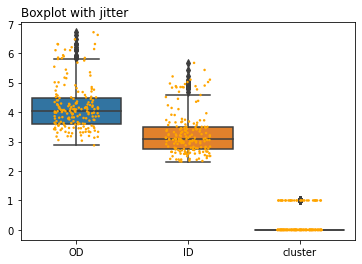

In [147]:
sns.boxplot( data=df11)
# add stripplot
ax = sns.stripplot(data=df11, color="orange", jitter=0.2, size=2.5)
# add title
plt.title("Boxplot with jitter", loc="left")

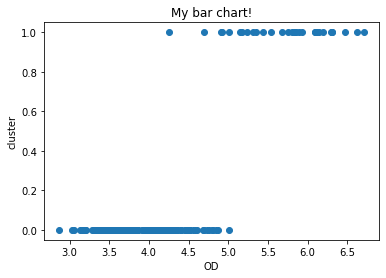

In [148]:
# plotting a bar chart
plt.scatter(df11["OD"], df11["cluster"])
  
# naming the x-axis
plt.xlabel('OD')
# naming the y-axis
plt.ylabel('cluster')
# plot title
plt.title('My bar chart!')
  
# function to show the plot
plt.show()



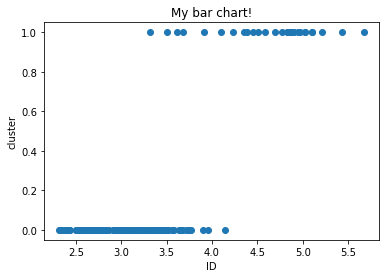

In [149]:
# plotting a bar chart
plt.scatter(df11["ID"], df11["cluster"])
  
# naming the x-axis
plt.xlabel('ID')
# naming the y-axis
plt.ylabel('cluster')
# plot title
plt.title('My bar chart!')
  
# function to show the plot
plt.show()